# **Project Name**    - Netflix Movies & TV shows Clustering -Unsupervised Learning



##### **Project Type**    
##### **Contribution**    - Individual
##### **Team Member 1 -** Rahna



**Project Summary**

Objective:
The primary objective of this project is to analyze and cluster a dataset related to Netflix's content. This dataset comprises various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and additional features. The aim is to uncover patterns and similarities among the content available on the platform and group them into meaningful clusters to provide insights for content categorization, recommendation systems, and content acquisition strategies.

Dataset Preprocessing:

Handling Missing Values: Identify and handle missing values in the dataset by using techniques such as imputation or removal of incomplete records, ensuring data integrity and completeness.
Removing Irrelevant Columns: Analyze the dataset to identify and remove columns that do not contribute to the clustering process, thereby simplifying the dataset and focusing on relevant features.
Transforming Categorical Variables: Convert categorical variables (e.g., genre, rating) into numerical representations using techniques such as one-hot encoding or label encoding, making the data suitable for clustering algorithms.
Feature Engineering: Apply feature engineering techniques to extract additional useful information from existing attributes, such as creating new features like the decade of release or combining multiple features into a single metric.
Exploratory Data Analysis (EDA):

Distribution Analysis: Visualize and analyze the distribution of individual variables to understand the spread and central tendencies of the data.
Trend Identification: Identify trends and patterns within the data, such as the popularity of certain genres over time or the relationship between duration and rating.
Correlation Analysis: Explore relationships between different features using correlation matrices and scatter plots to identify significant correlations that may influence clustering.
Outlier Detection: Identify and address outliers that may skew the results of the clustering analysis.
Clustering Analysis:

Algorithm Selection: Employ clustering algorithms such as k-means, hierarchical clustering,  group similar Netflix shows and movies together based on their attributes.
Optimal Number of Clusters: Determine the optimal number of clusters using techniques like the elbow method, silhouette analysis, or Davies-Bouldin index, ensuring meaningful and well-separated clusters.
Cluster Assignment: Assign each show and movie to a cluster, generating cluster labels for each data point.
Cluster Evaluation and Interpretation:

Cluster Characteristics: Analyze the clusters to understand the common characteristics and patterns within each group, such as dominant genres, typical durations, or common ratings.
Cluster Profiles: Create detailed profiles for each cluster, highlighting the defining features and unique aspects of each group.
Content Insights: Derive insights from the clusters that can inform Netflix’s content categorization, recommendation systems, and content acquisition strategies.
Visualization and Presentation:

Visualization Tools: Utilize visualizations such as bar charts, scatter plots, dendrograms, and heatmaps to effectively communicate the clustering results and insights.
Summary of Findings: Present a clear and concise summary of the findings, highlighting key insights and recommendations derived from the clustering analysis.
Recommendations: Provide actionable recommendations based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.

This project aims to comprehensively analyze a Netflix dataset, apply advanced clustering techniques to group similar shows and movies, and provide insightful recommendations based on the clustering results. The outcomes will contribute to a deeper understanding of Netflix's content landscape and support strategic decision-making processes within the company.

# **GitHub Link -**

Provide your GitHub Link here.

**Problem Statement**


This dataset encompasses TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine. It provides a comprehensive view of the content offered by Netflix, including attributes such as title, director, cast, country, genre, rating, and description.

In 2018, Flixable released a notable report revealing significant trends in Netflix's content library. Since 2010, the number of TV shows on Netflix has nearly tripled, indicating a strategic shift towards serialized content. Conversely, the number of movies has decreased by over 2,000 titles, highlighting a reduction in the platform's film catalog. This shift suggests a potential change in viewer preferences or strategic content acquisition decisions by Netflix.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-c03457761806>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Almabetter project/module_6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
Df_NETFLIX= pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
Df_NETFLIX.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# last n rows
Df_NETFLIX.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
# column name
Df_NETFLIX.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = Df_NETFLIX.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [ ]:
# Dataset Info
Df_NETFLIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = Df_NETFLIX.duplicated()
# Count the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


No duplicate values present in this dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = Df_NETFLIX.isnull().sum().sort_values(ascending=False)
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Total null values in the Netflix Dataset
total_missing_values = Df_NETFLIX.isnull().sum().sum()
print(f"Total number of missing values in the entire dataset: {total_missing_values}")

Total number of missing values in the entire dataset: 3631


In [ ]:
# Calculate and print the percentage of null values in each column
print("Percentage of null values in each variable:")
null_percentage = Df_NETFLIX.isnull().mean() * 100
null_percentage


Percentage of null values in each variable:


show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

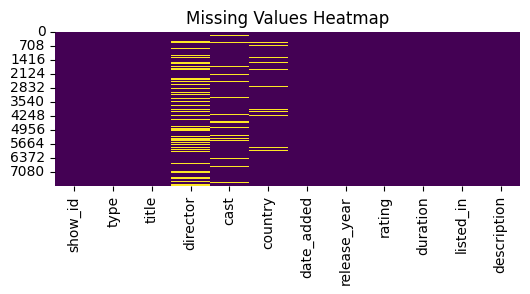

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(6,2))
sns.heatmap(Df_NETFLIX.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

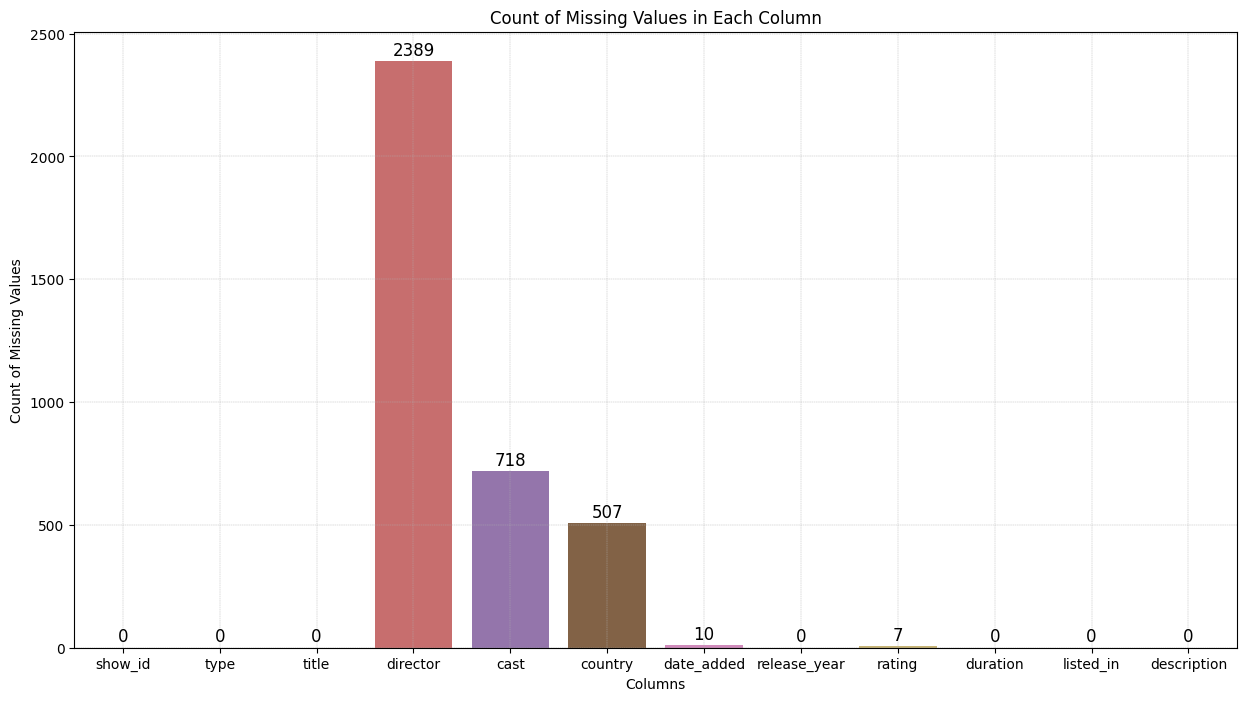

In [ ]:
# Create a bar plot of the count of missing values for each column
bar_color = sns.color_palette("muted")
plt.figure(figsize=(15, 8))
plots = sns.barplot(x=Df_NETFLIX.columns, y=Df_NETFLIX.isna().sum(), palette=bar_color)

# Add a grid to the plot
plt.grid(linestyle='--', linewidth=0.3)

# Annotate each bar with the count of missing values
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  # Format the height as an integer
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Annotation position
                   ha='center', va='center',  # Center alignment
                   size=12, xytext=(0, 8),  # Text size and offset
                   textcoords='offset points')  # Coordinate system for the offset

# Set the title and labels for better readability (optional)
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')

# Display the plot
plt.show()

### What did you know about your dataset?

The dataset 'Netflix Movies and TV Shows Clustering' is a comprehensive collection of 12 columns, predominantly consisting of categorical variables, while a single column is numeric. Among these columns, the presence of null values is observed in five categories: director, cast, country, date_added, and rating. However, there are no duplicate entries within the dataset.

This dataset is an invaluable asset for delving into the diverse landscape of content offered by Netflix, encompassing both movies and TV shows. Its richness lies in the potential to uncover nuanced trends and patterns in the streaming service's offerings over time. Moreover, the dataset serves as a fertile ground for developing sophisticated clustering models. By leveraging attributes such as genre, country of origin, and rating, these models can effectively group together similar titles, facilitating a deeper understanding of Netflix's content catalog and potentially enhancing user experience and content recommendation systems."

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_Netfli=Df_NETFLIX.copy()
print(list(df_Netfli.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df_Netfli.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

The dataset consists of the following attributes:

show_id: Unique identifier for each movie or TV show.

type: Type identifier indicating whether it is a movie or a TV show.

title: Title of the movie or TV show.

director: Director of the movie.

cast: Actors involved in the movie or TV show.

country: Country where the movie or TV show was produced.

date_added: Date when the movie or TV show was added on Netflix.

release_year: Actual release year of the movie or TV show.

rating: TV rating assigned to the movie or TV show.

duration: Total duration of the movie in minutes or number of seasons for TV shows.

listed_in: Genre categorization of the movie or TV show.

description: Summary description of the movie or TV show.

These attributes provide comprehensive information about each entry in the dataset, facilitating analysis of Netflix's content catalog and viewer preferences.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for colu in df_Netfli.columns:
  non_unique_values=len(df_Netfli[colu].unique())
  print(colu,':',non_unique_values)

show_id : 7787
type : 2
title : 7787
director : 4050
cast : 6832
country : 682
date_added : 1566
release_year : 73
rating : 15
duration : 216
listed_in : 492
description : 7769


In [ ]:
# Create a Pandas Series with unique values for each column
unique_values_series = pd.Series({col: df_Netfli[col].unique() for col in df_Netfli})
# Display the Pandas Series
print(unique_values_series)

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Calculate the total number of missing values for each column, sort in descending order, and display the top 4 columns
top_missing_values = df_Netfli.isnull().sum().sort_values(ascending=False)[:4]

# Display the result
print(top_missing_values)

director      2389
cast           718
country        507
date_added      10
dtype: int64


In [ ]:
# Calculate and print the percentage of null values in each column
print("Percentage of null values in each variable:")
null_percentage = df_Netfli.isnull().mean() * 100
null_percentage = null_percentage.sort_values(ascending=False)[:4]
print(null_percentage)

Percentage of null values in each variable:
director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
dtype: float64


In [ ]:
# Imputing null values with 'unknown' in 'director' and 'cast' features
df_Netfli['director'].fillna('unknown', inplace=True)
df_Netfli['cast'].fillna('unknown', inplace=True)

# Imputing null values of 'country' with mode
df_Netfli['country'].fillna(df_Netfli['country'].mode()[0], inplace=True)

# Dropping remaining null values in 'date_added' and 'rating'
df_Netfli.dropna(subset=['date_added', 'rating'], inplace=True)


1.   Considering that 'date_added' and 'rating' have a very low percentage of null values, we can safely drop those observations to maintain the integrity of our clustering model and avoid any potential bias.

2.   For 'director' and 'cast', since the null percentage is relatively high and we lack data on the actual movie/TV shows, it's prudent to replace those entries with 'unknown' to retain the information without introducing erroneous assumptions.

1.  Regarding 'country', given its low percentage of null values (6%) and the predominant occurrence of movies/shows from the US, we can confidently fill in the missing values with the mode, ensuring minimal disruption to the dataset."





In [ ]:
# Check for remaining missing values
print(df_Netfli.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Checking info of the dataset before typecasting
df_Netfli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df_Netfli['duration'] = df_Netfli['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Typecasting string object to datetime object of date_added column
df_Netfli['date_added'] = pd.to_datetime(df_Netfli['date_added'], errors='coerce')

# Extracting date, day, month and year from date_added column
df_Netfli["day_added"]= df_Netfli["date_added"].dt.day
df_Netfli["month_added"]= df_Netfli["date_added"].dt.month
df_Netfli["year_added"]= df_Netfli["date_added"].dt.year

# Dropping date_added
df_Netfli.drop('date_added', axis=1, inplace=True)

In [ ]:
df_Netfli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   release_year  7770 non-null   int64  
 7   rating        7770 non-null   object 
 8   duration      7770 non-null   int64  
 9   listed_in     7770 non-null   object 
 10  description   7770 non-null   object 
 11  day_added     7682 non-null   float64
 12  month_added   7682 non-null   float64
 13  year_added    7682 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 910.5+ KB


### What all manipulations have you done and insights you found?

In this data wrangling section, we addressed missing values by performing the following steps: imputing 'director' and 'cast' with 'Unknown', filling missing values in 'country' with the mode, and dropping null values in 'date_added' and 'rating' columns due to their low percentage.
We converted the 'duration' column to integers by removing 'min' and 'seasons' from the values, and transformed the 'date_added' column into the datetime format as required.
We also extracted the following features: 'date' from 'date_added', 'month' from 'date_added', and 'year' from 'date_added'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 The relative percentage of the total number of movies and TV shows on Netflix."








In [ ]:
# Chart - 1 visualization code
# Calculate the total number of movies and TV shows
total_counts = df_Netfli['type'].value_counts()

# Calculate the relative percentage of each category
relative_percentage = total_counts / total_counts.sum() * 100

print(relative_percentage)

type
Movie      69.137709
TV Show    30.862291
Name: count, dtype: float64


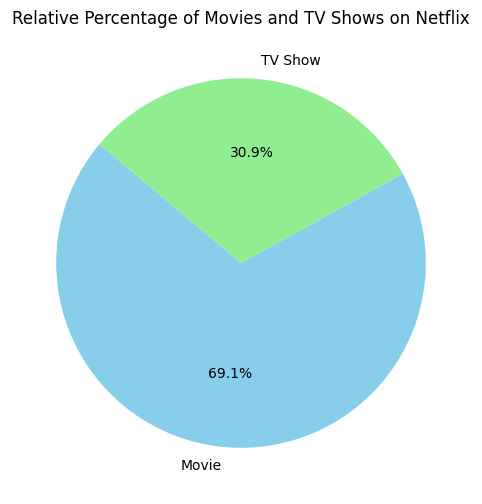

In [ ]:
# Plot the relative percentages of movies and TV shows
plt.figure(figsize=(8, 6))
relative_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Relative Percentage of Movies and TV Shows on Netflix')
plt.ylabel('')  # Hide the y-label
plt.show()

##### 1. Why did you pick the specific chart?

chose a pie chart for visualizing the relative percentage of movies and TV shows on Netflix for the following reasons:

Proportional Representation: Pie charts are excellent for displaying the proportion of different categories within a whole. In this case, it effectively shows the relative percentages of movies and TV shows out of the total content.

Simplicity and Clarity: A pie chart provides a straightforward visual comparison between two categories, making it easy to understand the distribution at a glance.

##### 2. What is/are the insight(s) found from the chart?

Movies Dominance: Approximately 69.05% of Netflix content is movies, indicating a larger movie catalog.
Substantial TV Shows: TV shows account for 30.95% of the content, showing a significant focus on series.
Balanced Content Strategy: The distribution suggests Netflix aims to cater to diverse viewer preferences by offering both movies and TV shows.
Potential Growth Areas: If TV shows are in high demand, Netflix might consider expanding its TV show offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on content distribution aid Netflix in targeting its acquisitions, enhancing customer satisfaction, tailoring marketing efforts, and guiding investment decisions. However, over-reliance on movies, content saturation, neglecting emerging trends, and failing to adapt to market dynamics pose potential risks to growth. Maintaining a balance between movies and TV shows is crucial for sustaining competitiveness and meeting diverse viewer demands.

#### Chart - 2 Content added over the years

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
tv_show = df_Netfli[df_Netfli["type"] == "TV Show"]
movie = df_Netfli[df_Netfli["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

##### 1. Why did you pick the specific chart?

The line chart is a suitable choice for illustrating the trend and distribution of data across a continuous axis, such as the years in this case. It enables straightforward comparison between the counts of TV shows and movies, showcasing how their numbers fluctuate over time.

##### 2. What is/are the insight(s) found from the chart?

The visualization trend suggests that from 2008 to 2022, there were comparatively fewer additions of TV shows and movies to Netflix. However, starting around 2016, there was a gradual uptick in content additions. Notably, in 2019, there was a substantial surge in movie additions, whereas TV shows exhibited a similar trend but with a less pronounced increase compared to movies.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained suggest a positive trajectory for Netflix, as the demand for both TV shows and movies on the platform has steadily risen over the years. This growth signifies an opportunity for Netflix to deliver a broader range of high-quality content to its users, ultimately enriching user satisfaction and engagement.

#### Chart - 3 Month-wise Addition of Movies and TV Shows on Netflix

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'df_Netfli' is the DataFrame containing Netflix data
# Create a DataFrame to store month values and their counts
months_df = pd.DataFrame(df_Netfli['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'month_added': 'month'}, inplace=True)
# Check the DataFrame structure
print(months_df.head())
print(months_df.columns)

   month  count
0   12.0    816
1   10.0    780
2    1.0    745
3   11.0    730
4    3.0    660
Index(['month', 'count'], dtype='object')


In [ ]:
# Create a bar chart using Plotly Express
fig = px.bar(months_df, x='month', y='count', text_auto=True, color='count',
             color_continuous_scale=px.colors.sequential.Viridis)

# Update the layout of the figure
fig.update_layout(
    title={
        'text': 'Month-wise Addition of Movies and TV Shows on Netflix',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1000,
    height=500,
    showlegend=True
)

# Display the figure
fig.show()

##### 1. Why did you pick the specific chart?

The bar chart is ideal for comparing and displaying categorical data (months) and their respective counts. It effectively illustrates the distribution of content additions over various months, helping to identify patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

From October to December, there is a noticeable surge in the number of TV shows and movies released on Netflix. These months coincide with various holidays and celebrations, such as Halloween, Diwali, Thanksgiving, and Christmas, when people typically spend more time at home and seek entertainment options."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart indicate that planning content releases during high-demand months (October to December) can have a positive business impact by aligning with user viewing habits and increasing engagement. However, Netflix must balance this strategy by ensuring a consistent content flow throughout the year to maintain user interest and avoid over-reliance on seasonal trends. Additionally, careful management of operational resources and competitive differentiation is essential to mitigate potential negative growth risks.

#### Chart - 4 director appeared in most of the movies and tv shows

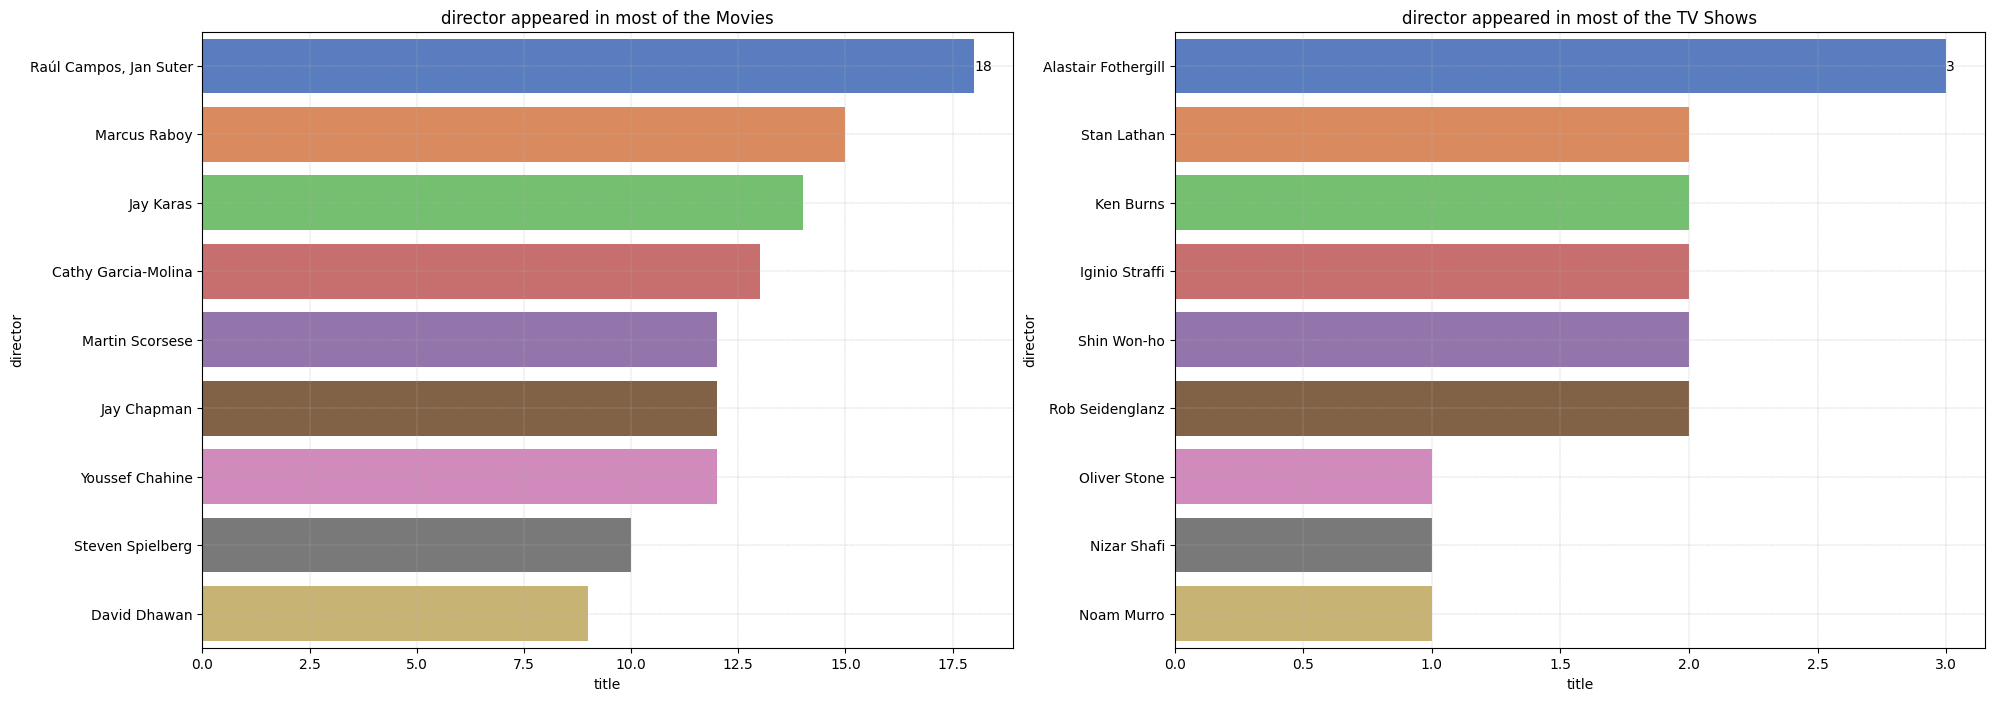

In [ ]:
# Chart - 4 visualization code
# Spearating the dataframes for further analysis
df_movies= df_Netfli[df_Netfli['type']== 'Movie']
df_tvshows= df_Netfli[df_Netfli['type']== 'TV Show']
# Top 10 director in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "director",x = 'title', data = df_director, palette='muted')
  plt.title(f'director appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

By choosing bar charts, we ensure that the data is presented in a clear, concise, and visually appealing manner, making it easy to derive insights about the top directors in both movies and TV shows on Netflix.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the movies directed by **jan suter,raul campus**.

2. Most TV shows directed by **alastair fothergil**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from identifying the most prolific directors in movies and TV shows on Netflix can help create a positive business impact by guiding strategic content production, marketing efforts, and quality assurance. However, to mitigate risks of negative growth, Netflix should ensure a balanced approach by fostering a diverse pool of creative talent and not overly relying on a few directors. This strategy can help maintain content variety, sustain viewer interest, and drive long-term growth.

#### Chart - 5 Top 10 Ratings Given for Movies and Shows

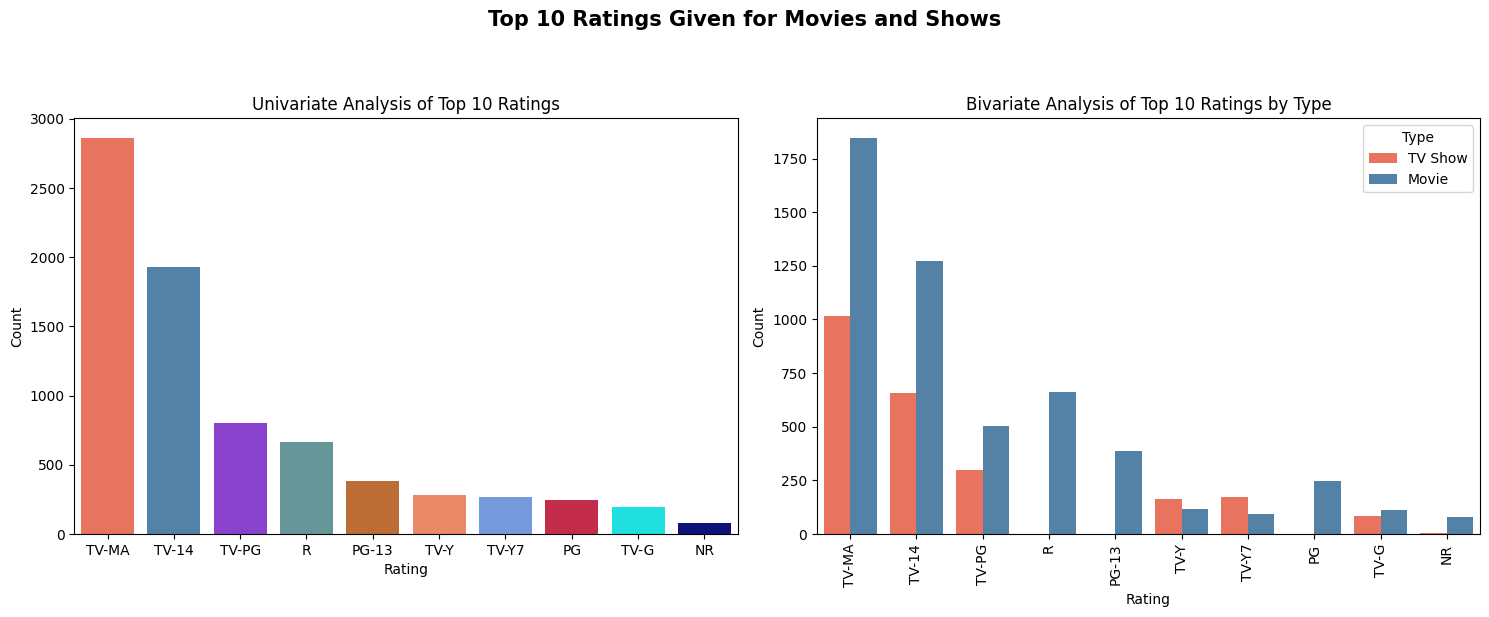

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
custom_palette = ['#FF6347', '#4682B4', '#8A2BE2', '#5F9EA0', '#D2691E', '#FF7F50', '#6495ED', '#DC143C', '#00FFFF', '#00008B']
# Set the main title for the figure
plt.suptitle('Top 10 Ratings Given for Movies and Shows', weight='bold', y=1.02, size=15)

# Univariate analysis
sns.countplot(x="rating", data=df_Netfli, order=df_Netfli['rating'].value_counts().index[:10], ax=ax[0],palette=custom_palette)
ax[0].set_title('Univariate Analysis of Top 10 Ratings')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')

# Bivariate analysis
sns.countplot(x="rating", data=df_Netfli, hue='type', order=df_Netfli['rating'].value_counts().index[:10], ax=ax[1],palette=custom_palette)
ax[1].set_title('Bivariate Analysis of Top 10 Ratings by Type')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
ax[1].legend(title='Type')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

countplot is specifically designed for visualizing the counts of observations in categorical data. Since ratings are categorical (distinct rating values), this plot is appropriate for displaying the frequency of each rating.

##### 2. What is/are the insight(s) found from the chart?

The majority of movies and TV shows have a TV-MA rating (Mature Audience), followed by TV-14 (Younger Audience). Movies tend to receive higher ratings compared to TV shows, which is expected given the higher number of movies compared to TV shows, as seen earlier in the type column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help target mature audiences more effectively, potentially increasing viewership and revenue. However, the focus on mature content might alienate younger audiences, possibly leading to a decline in that segment.

#### Chart - 6  Top 10 Countries for Content Creation

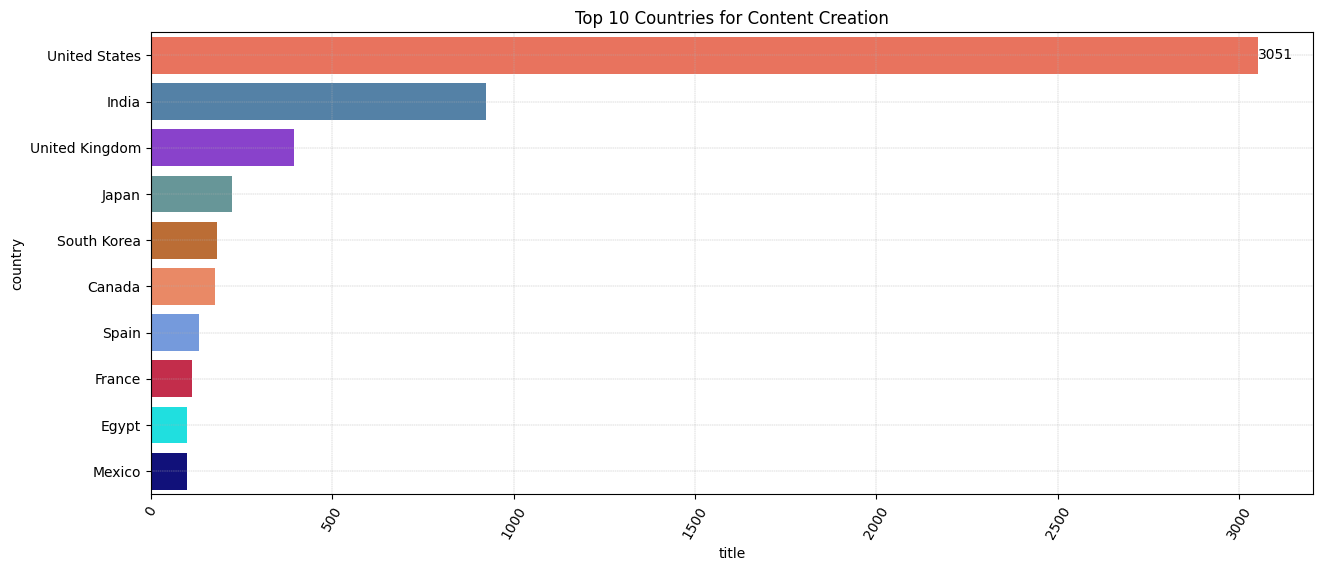

In [ ]:
# Chart - 6 visualization code
# Group the data by 'Country' and count unique titles per country
df_Netfli_country =df_Netfli.groupby('country').agg({'title': 'nunique'}).reset_index()

# Sort the countries by the number of unique titles, descending, and select the top 10
df_Netfli_country =df_Netfli_country.sort_values(by='title', ascending=False).head(10)

# Create a figure with specified dimensions
plt.figure(figsize=(15, 6))

# Create a bar plot with 'Country' on the y-axis and 'title' on the x-axis
plots = sns.barplot(x='title', y='country', data=df_Netfli_country,palette=custom_palette )

# Set rotation for x-axis labels for better readability
plt.xticks(rotation=60)

# Set a title for the plot
plt.title('Top 10 Countries for Content Creation')

# Add grid lines with specific style and width
plt.grid(linestyle='--', linewidth=0.3)

# Label each bar with the count of unique titles
plots.bar_label(plots.containers[0])

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

chose a horizontal bar chart because it efficiently displays the relative counts of unique titles for each country, making it easier to compare and quickly identify the top content-creating countries, especially when dealing with long country names.

##### 2. What is/are the insight(s) found from the chart?

The United States leads as the top producer of both movies and TV shows on Netflix, highlighting the platform's significant reliance on American content.

India ranks as the second-largest producer of movies on Netflix, reflecting Bollywood's increasing global appeal.

Countries such as Canada, France, and Japan also have a notable presence in the dataset, demonstrating the diversity of content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can positively impact business by guiding Netflix to capitalize on the strong market demand for American and Indian films, potentially increasing subscriber engagement and retention. There might not be direct evidence of negative growth from these insights, but an over-reliance on content from a few countries could limit diversity and alienate subscribers from regions that are underrepresented. This could lead to a less engaging platform for a global audience, potentially hindering market expansion and subscriber diversity.

#### Chart - 7 Which countries exhibit the broadest distribution of movies and TV shows on Netflix.

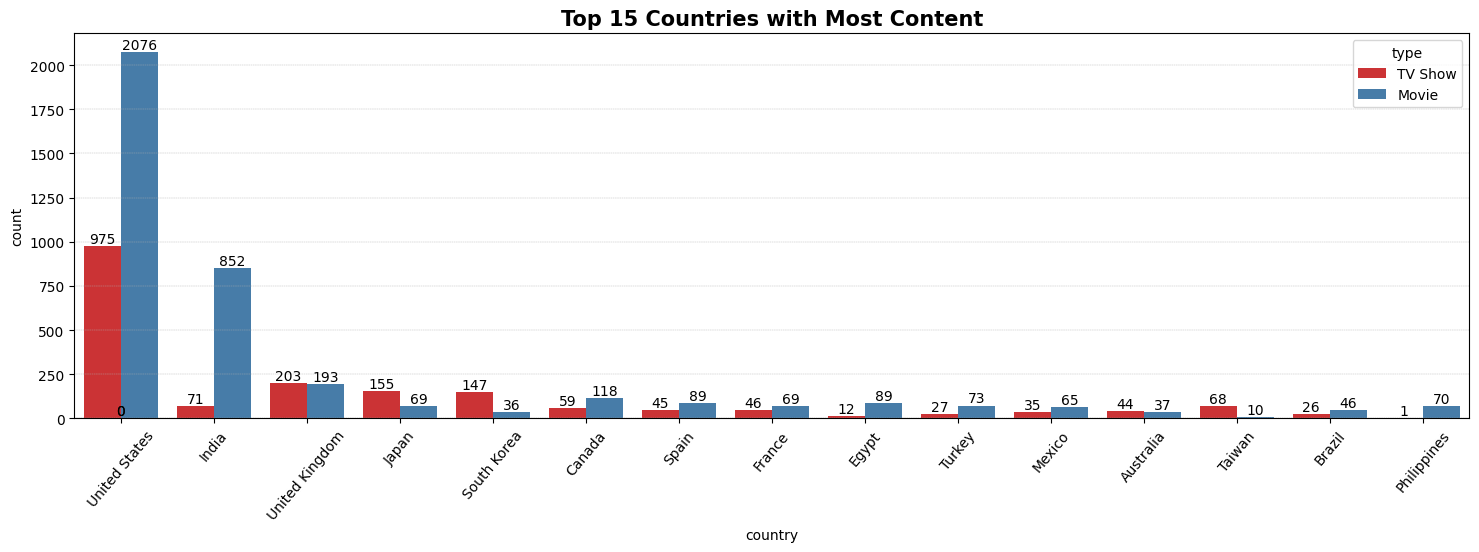

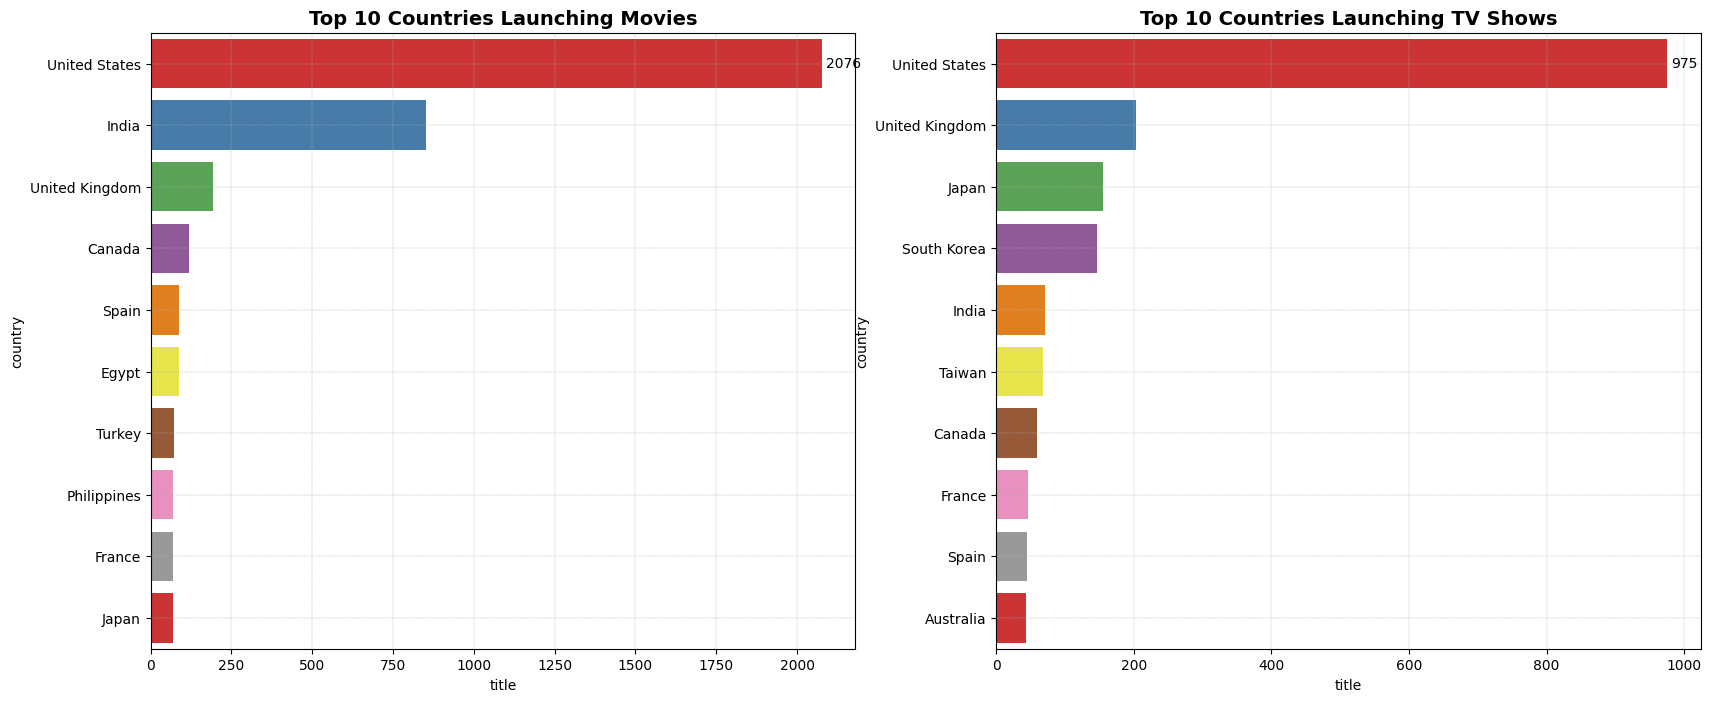

In [ ]:
# Set up the overall figure for the first plot
plt.figure(figsize=(18, 5))
plt.grid(linestyle='--', linewidth=0.3)

# Create a countplot to show the distribution of content by country and type
sns.countplot(
    x=df_Netfli['country'],
    order=df_Netfli['country'].value_counts().index[:15],
    hue=df_Netfli['type'],
    palette="Set1"
)
plt.xticks(rotation=50)
plt.title('Top 15 Countries with Most Content', fontsize=15, fontweight='bold')

# Adding value labels to the first plot
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                       textcoords='offset points')

plt.show()

# Set up the overall figure for the second plot
plt.figure(figsize=(20, 8))

# Loop through datasets for Movies and TV Shows
for dataset, content_type, subplot_index in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, subplot_index + 1)
    df_Netfli_country = dataset.groupby(['country']).agg({'title': 'nunique'}).reset_index()
    df_Netfli_country = df_Netfli_country.sort_values(by='title', ascending=False)[:10]

    # Create a bar plot for the top 10 countries
    plots = sns.barplot(
        y="country",
        x='title',
        data=df_Netfli_country,
        palette='Set1'
    )
    plt.title(f'Top 10 Countries Launching {content_type}', fontsize=14, fontweight='bold')
    plt.grid(linestyle='--', linewidth=0.3)

    # Adding value labels to each bar in the second set of plots
    plots.bar_label(plots.containers[0], padding=3)  # Adjust padding as necessary for alignment

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

chose the horizontal bar chart for displaying the top countries by content type due to its clarity in comparing numerous and lengthy country labels, while the countplot with hue was selected for its effectiveness in visually illustrating the distribution of content types across those countries.



##### 2. What is/are the insight(s) found from the chart?

India and united state Produces most amount of Movies in compare to TV Shows.

Japan, South korea, taiwan produces more TV Shows in compare to Movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can positively influence business strategies by tailoring content offerings to audience preferences, yet over-reliance on specific regions may limit diversity and hinder global growth potential.

#### Chart - 8 Top 10 TV Show and movies Actors

In [ ]:
# Chart - 8 visualization code
tv_show_actors_count = len(df_Netfli[df_Netfli['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack().value_counts())
movie_actors_count = len(df_Netfli[df_Netfli['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack().value_counts())

print(f"Number of TV Shows actors: {tv_show_actors_count}")
print(f"Number of Movies actors: {movie_actors_count}")


Number of TV Shows actors: 13526
Number of Movies actors: 23043


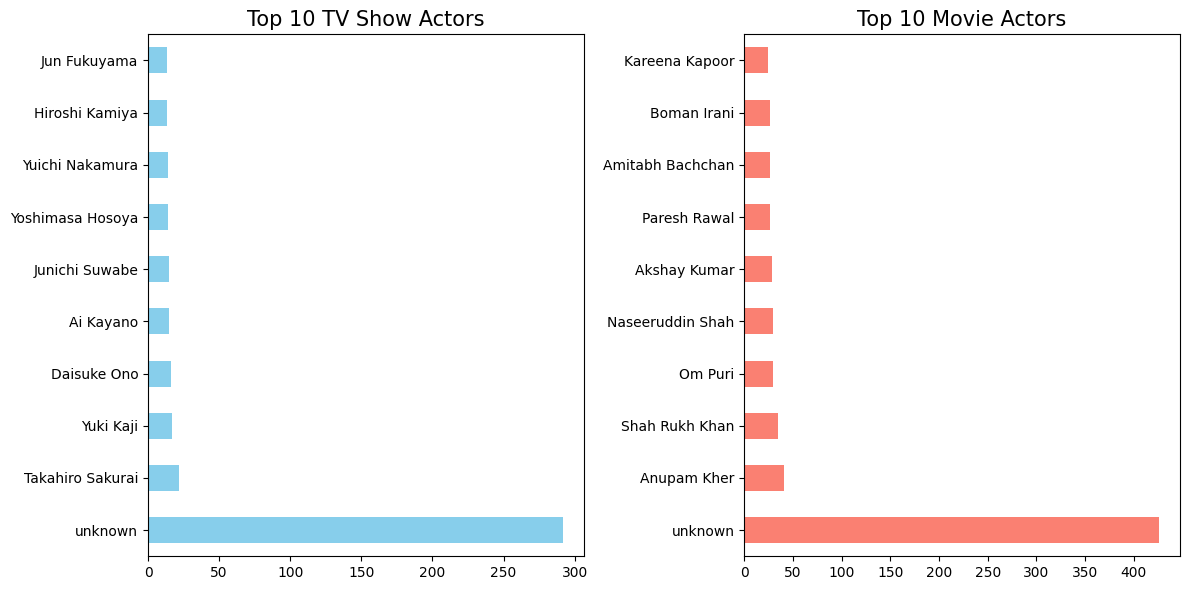

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Seperate TV show actors from the 'cast' column
top_TVshows_actor = df_Netfli[df_Netfli['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
# Plot actors who appeared in the highest number of TV shows
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0], color='skyblue')
a.set_title('Top 10 TV Show Actors', size=15)

# Seperate movie actors from the 'cast' column
top_movie_actor = df_Netfli[df_Netfli['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
# Plot actors who appeared in the highest number of movies
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1], color='salmon')
b.set_title('Top 10 Movie Actors', size=15)

# Show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose horizontal bar charts for both TV show and movie actors because they efficiently display the top actors by count, allowing for easy comparison and visualization of the most prominent figures in each category.

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher, Shahrukh Khan, and Om Puri dominate movie roles, while Takahiro Sakurai, Yuki Kaji, and Daisuke Ono lead in TV show roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the most prominent actors in movies and TV shows can help tailor content strategies and potentially attract viewership, but over-reliance on a few actors may limit diversity and hinder the platform's appeal to a broader audience.



#### Chart - 9 Total number of Movies/TV Shows released and added per year on Netflix

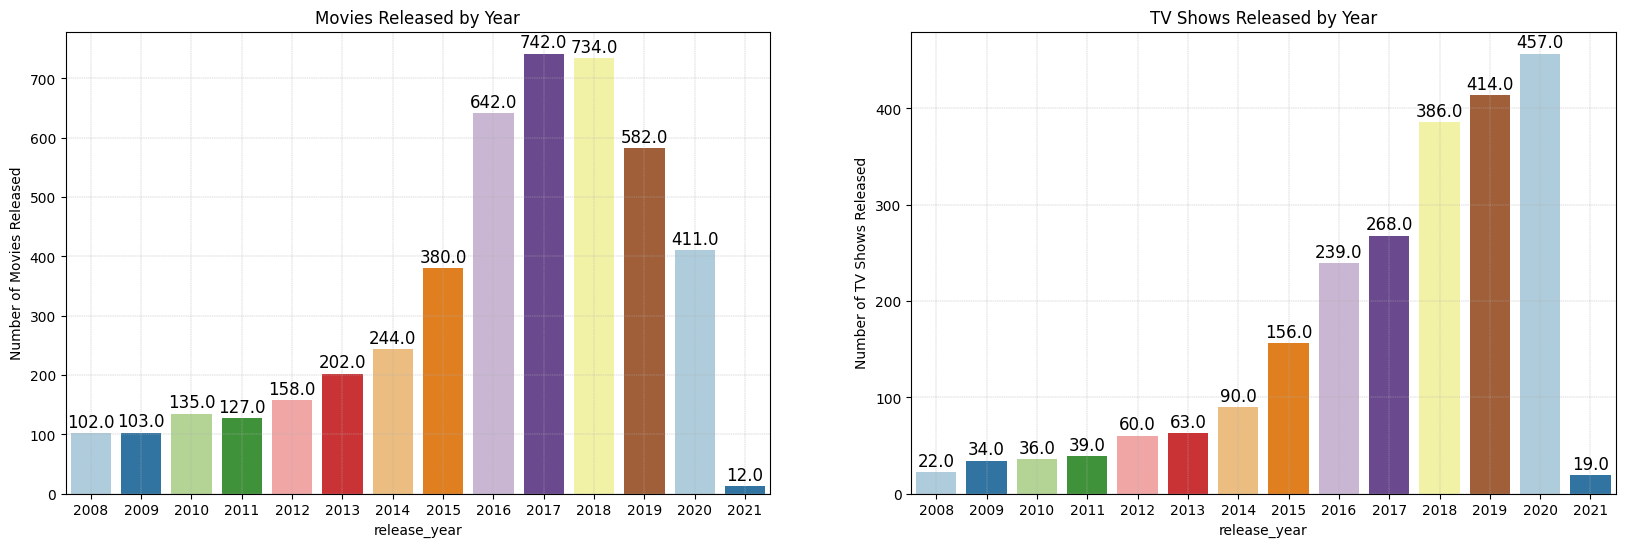

In [ ]:
# Function to create plots for releases and additions
def create_plots(df_Netfli, content_type, ylabel):
    plt.figure(figsize=(20, 6))
    for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
        plt.subplot(1, 2, k + 1)
        df_Netfli_grouped = i.groupby(['release_year']).agg({'title': 'nunique'}).reset_index().sort_values(by=['release_year'], ascending=False)[:14]
        plots = sns.barplot(x='release_year', y='title', data=df_Netfli_grouped, palette='Paired')  # Changed palette to 'Paired'
        plt.title(f'{j} Released by Year')
        plt.ylabel(f"Number of {j} Released")
        plt.grid(linestyle='--', linewidth=0.3)

        for bar in plots.patches:
            plots.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                           ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    plt.show()

# Call the function for releases
create_plots(df_Netfli, 'content', 'content')




##### 1. Why did you pick the specific chart?

I chose bar plots for visualizing the number of content releases and additions over the years because they effectively display the distribution and trends of data across different time periods, making it easy to observe patterns and variations..

##### 2. What is/are the insight(s) found from the chart?

The data illustrates a consistent rise in both movie and TV show additions on Netflix annually. However, from 2018 onwards, there's been a notable decline in movie releases, contrasted by a substantial increase in TV show additions. In 2020, the number of movie additions decreased compared to 2019, while TV show additions surged significantly in comparison.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights regarding the decline in movie additions and the rise in TV show additions could potentially hinder Netflix's growth due to reduced content variety and shifting consumer preferences. However, by diversifying content offerings to include documentaries, limited series, and other formats, Netflix can adapt to these changes and potentially attract a broader audience, leading to positive business impact.

#### Chart - 10 Most Popular listed_ins on Netflix

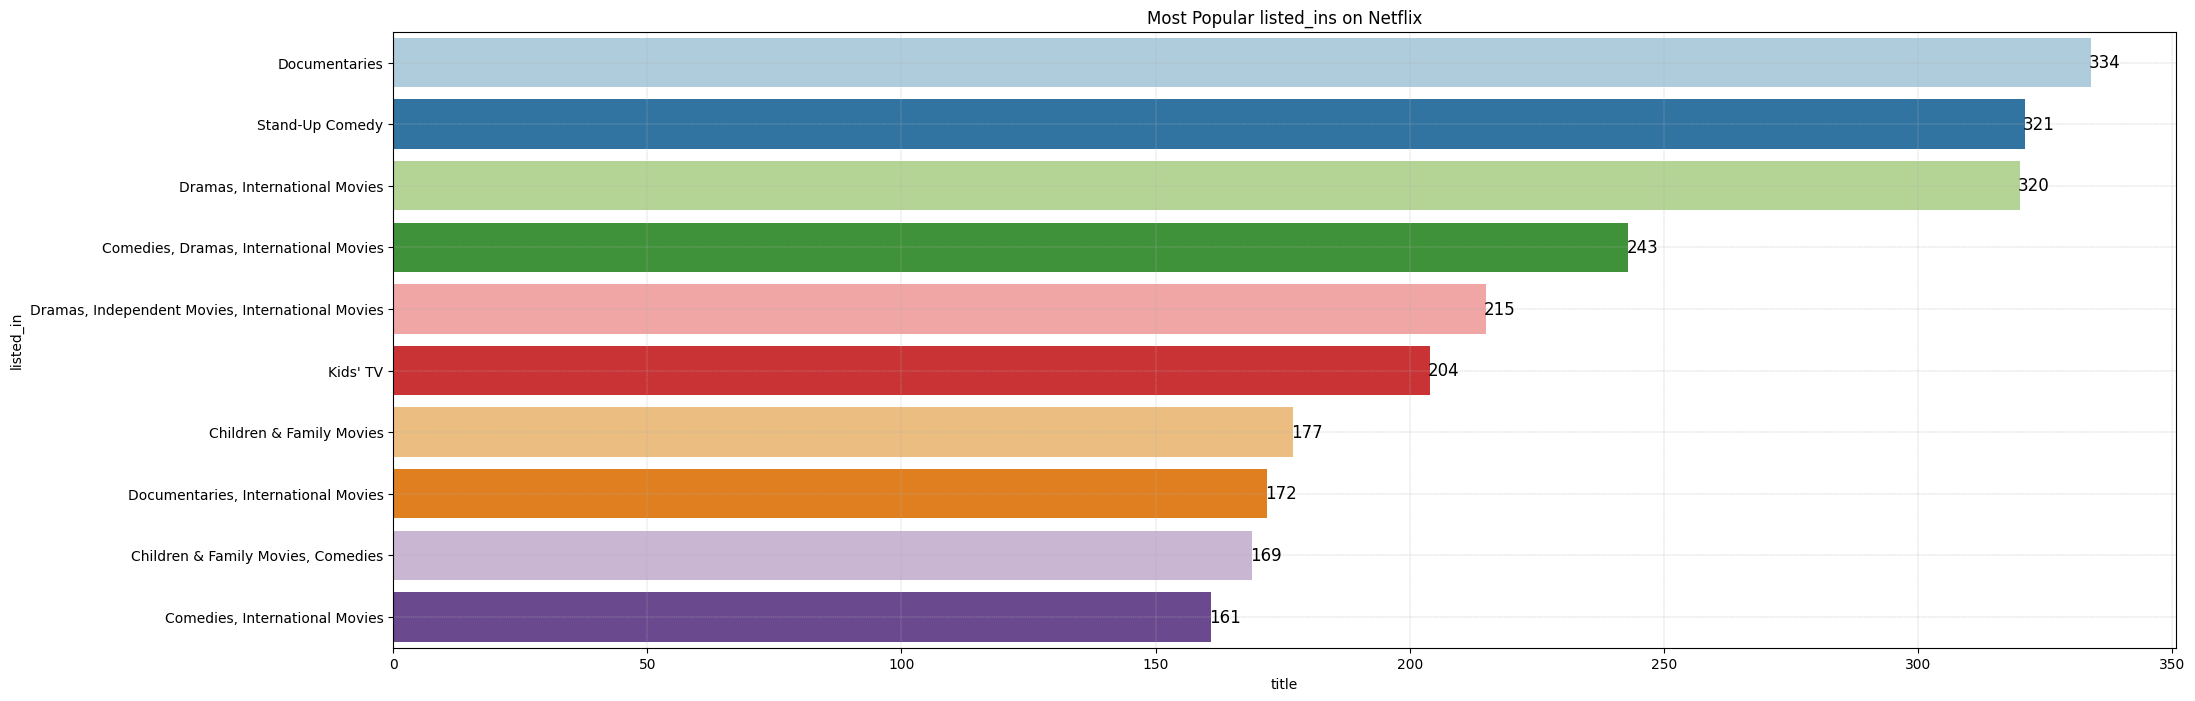

In [ ]:
# Chart - 10 visualization code
# Set figure size for the first plot
plt.figure(figsize=(23, 8))

# Group data by listed_in and count unique titles
df_Netfli_genre =df_Netfli.groupby(['listed_in']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]

# Create bar plot for most popular listed_ins on Netflix
plots = sns.barplot(y="listed_in", x='title', data=df_Netfli_genre, palette='Paired')  # Changed palette to 'Pastel1'
plt.title('Most Popular listed_ins on Netflix')
plt.grid(linestyle='--', linewidth=0.3)

# Add value labels to the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   ha='center', va='center',
                   size=12, xytext=(10, 0),
                   textcoords='offset points')

plt.show()


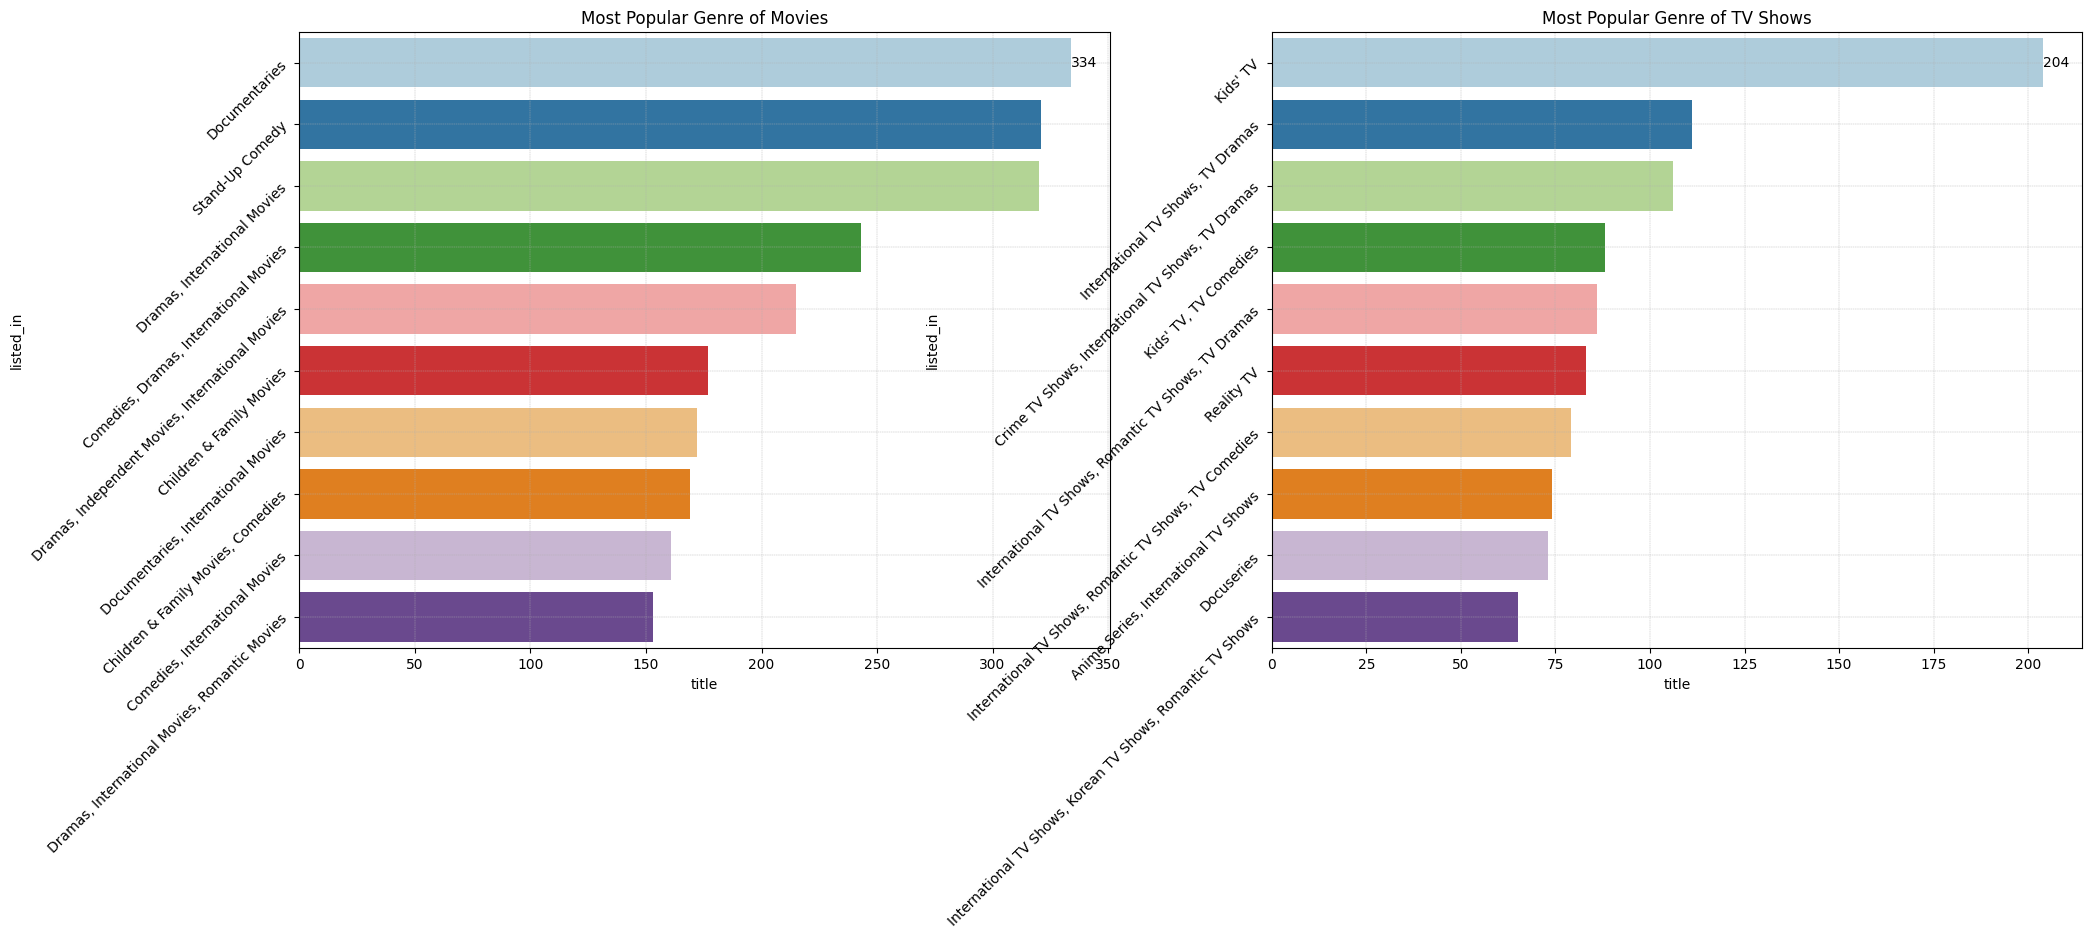

In [ ]:
# Set figure size for the second plot
plt.figure(figsize=(23, 8))

# Loop through datasets for Movies and TV Shows
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)
    df_genre = i.groupby(['listed_in']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
    plots = sns.barplot(y="listed_in", x='title', data=df_genre, palette='Paired')  # Changed palette to 'paired'
    plt.title(f'Most Popular Genre of {j}')
    plt.grid(linestyle='--', linewidth=0.3)
    plots.bar_label(plots.containers[0])
    plt.yticks(rotation=45)

plt.show()


##### 1. Why did you pick the specific chart?

I chose bar plots because they effectively showcase the most popular genres on Netflix, allowing for clear comparisons and easy visualization of genre distribution across movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

International movies genre is most popular** in both the TV Shows and Movies category.documentries and kid tv are popular

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights acquired could positively influence Netflix's business strategy by offering valuable insights into audience preferences regarding genres and content types. This understanding enables Netflix to refine its content acquisition and production strategies, aligning them more closely with viewer preferences, ultimately fostering higher engagement and greater customer satisfaction.








#### Chart - 11 Total Number of Movies/TV Shows added per month on Netflix

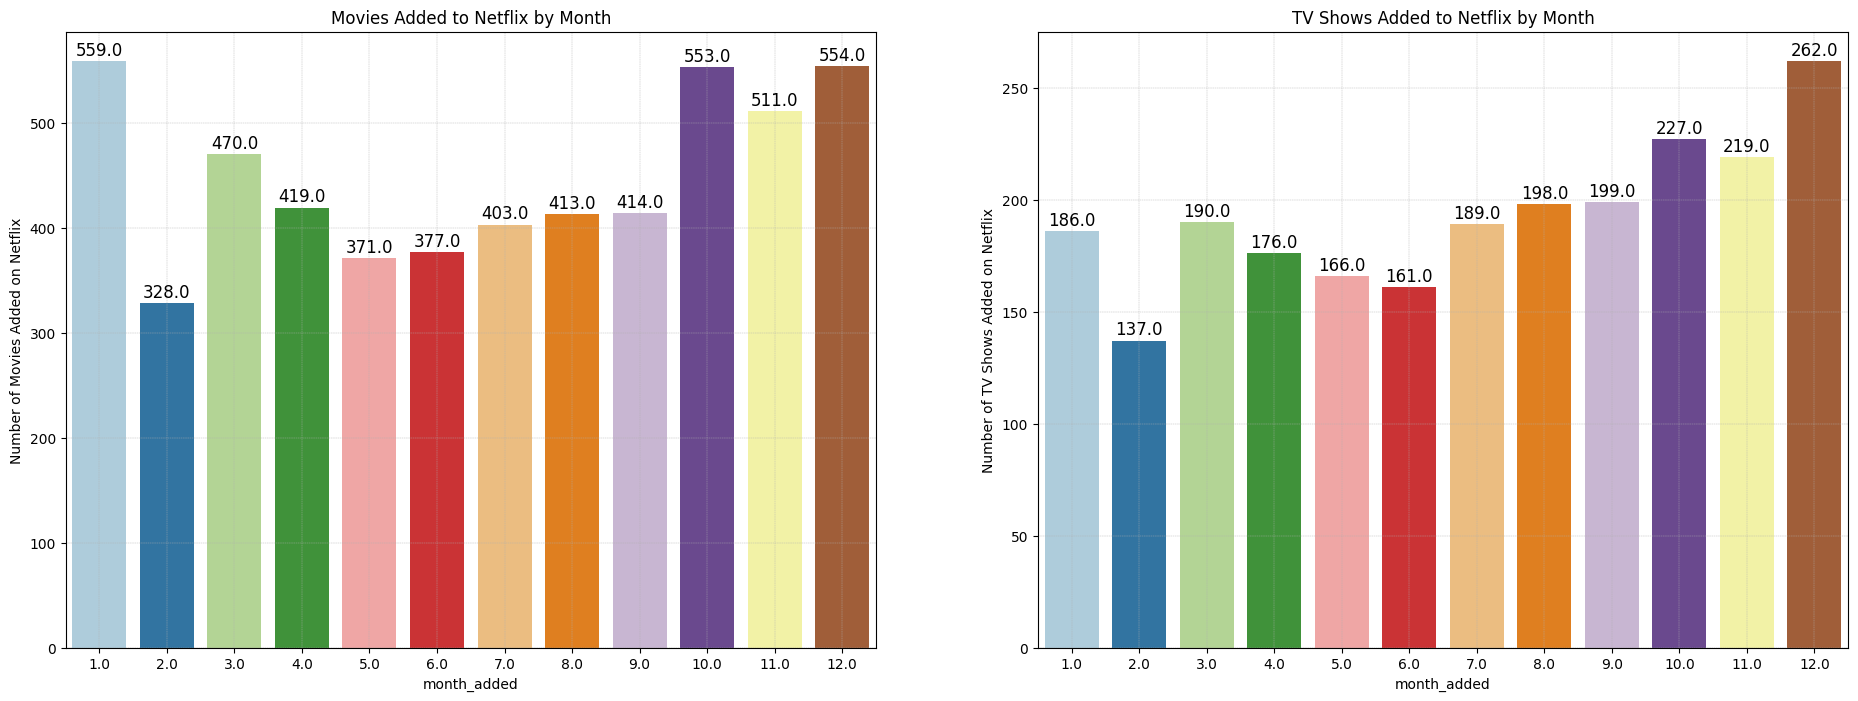

In [ ]:
# Chart - 11 visualization code
# Set the figure size
plt.figure(figsize=(23, 8))

# Loop through datasets for Movies and TV Shows
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group data by month_added and count unique titles
    df_month = i.groupby(['month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['month_added'], ascending=False)

    # Create bar plot for content added by month
    plots = sns.barplot(x='month_added', y='title', data=df_month, palette='Paired')  # Changed palette to 'Set2'
    plt.title(f'{j} Added to Netflix by Month')
    plt.ylabel(f"Number of {j} Added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)

    # Add value labels to the bars
    for bar in plots.patches:
        plots.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.show()


##### 1. Why did you pick the specific chart?

I chose bar plots because they effectively display the number of movies and TV shows added to Netflix each month, allowing for easy comparison and visualization of trends over time.

##### 2. What is/are the insight(s) found from the chart?

October, November, and December emerge as the prime months for TV show additions, while January, October, and December stand out as the top months for movie additions. Conversely, February records the least activity in terms of both movie and TV show additions to Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the most popular and least popular months for content additions on Netflix can inform strategic content release planning, potentially driving positive business outcomes, while the absence of new content during less popular months may lead to negative growth if not addressed effectively.

#### Chart - 12 What is the month-wise count of content added each year on Netflix?

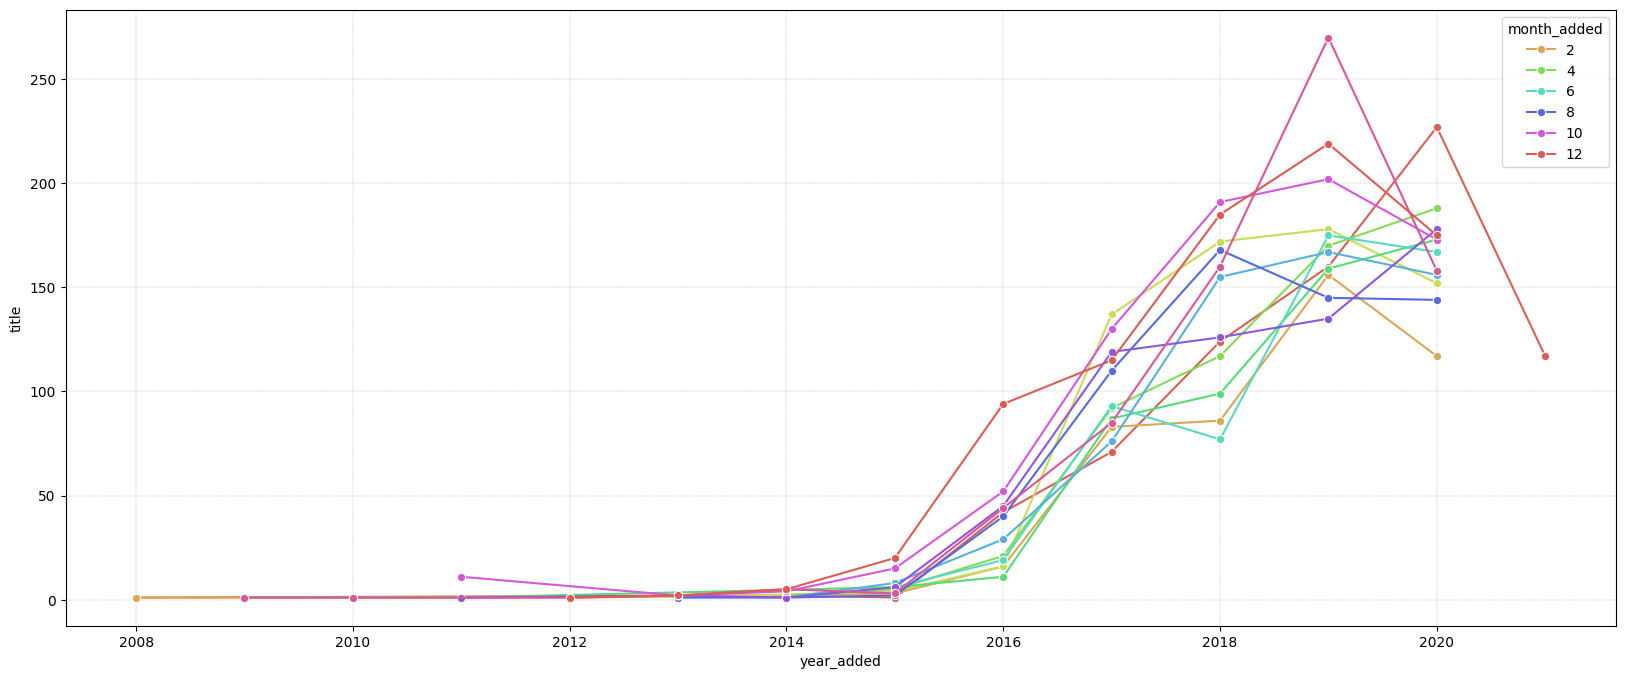

In [ ]:
# Chart - 12 visualization code
# Grouping data by year and month of addition
dfdf_Netfli_year_month =df_Netfli.groupby(['year_added', 'month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['year_added'], ascending=False)

# Plotting line chart
plt.figure(figsize=(20, 8))
sns.lineplot(x='year_added', y='title', data=dfdf_Netfli_year_month, palette='hls', hue='month_added', marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line plot because it effectively visualizes the trend of content additions to Netflix over time, showing how the number of titles added varies across different years and months. This type of chart allows for clear interpretation of temporal patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The data reveals inconsistent trends, with certain consecutive years showing recurring patterns:

From 2008 to 2009, movies were added predominantly in February, and from 2009 to 2011, in both February and October.

After 2015, a notable trend emerges where the majority of content is added between October and December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the recurring patterns of content additions can potentially lead to positive business impact by informing strategic planning and resource allocation. For instance, understanding the months with higher content additions allows Netflix to optimize marketing efforts, attract more subscribers, and enhance viewer engagement during those periods.

Conversely, the lack of consistent trends may present challenges in forecasting and resource allocation, potentially leading to negative growth if not addressed effectively. Inconsistent patterns could result in inefficient content release strategies, impacting subscriber retention and satisfaction. To mitigate this, Netflix could implement adaptive strategies, such as diversifying content releases throughout the year or leveraging data analytics to anticipate fluctuations in viewer demand.

#### Chart - 13 Distribution of Movie and TV Shows Durations

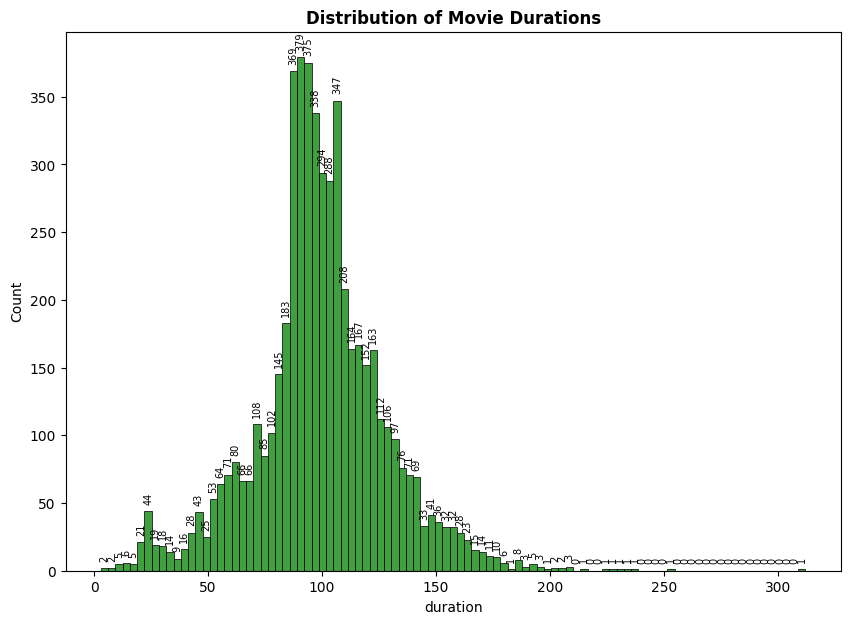

In [ ]:
# Chart - 13 visualization code
# Plotting the distribution of movie durations
plt.figure(figsize=(10, 7))
plots = sns.histplot(df_movies['duration'], kde=False, color='green')  # Changed to histplot for better control
plt.title('Distribution of Movie Durations', fontweight="bold")

# Adding value labels to the bars
for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', size=7, xytext=(0, 5), textcoords='offset points', rotation=90)

plt.show()



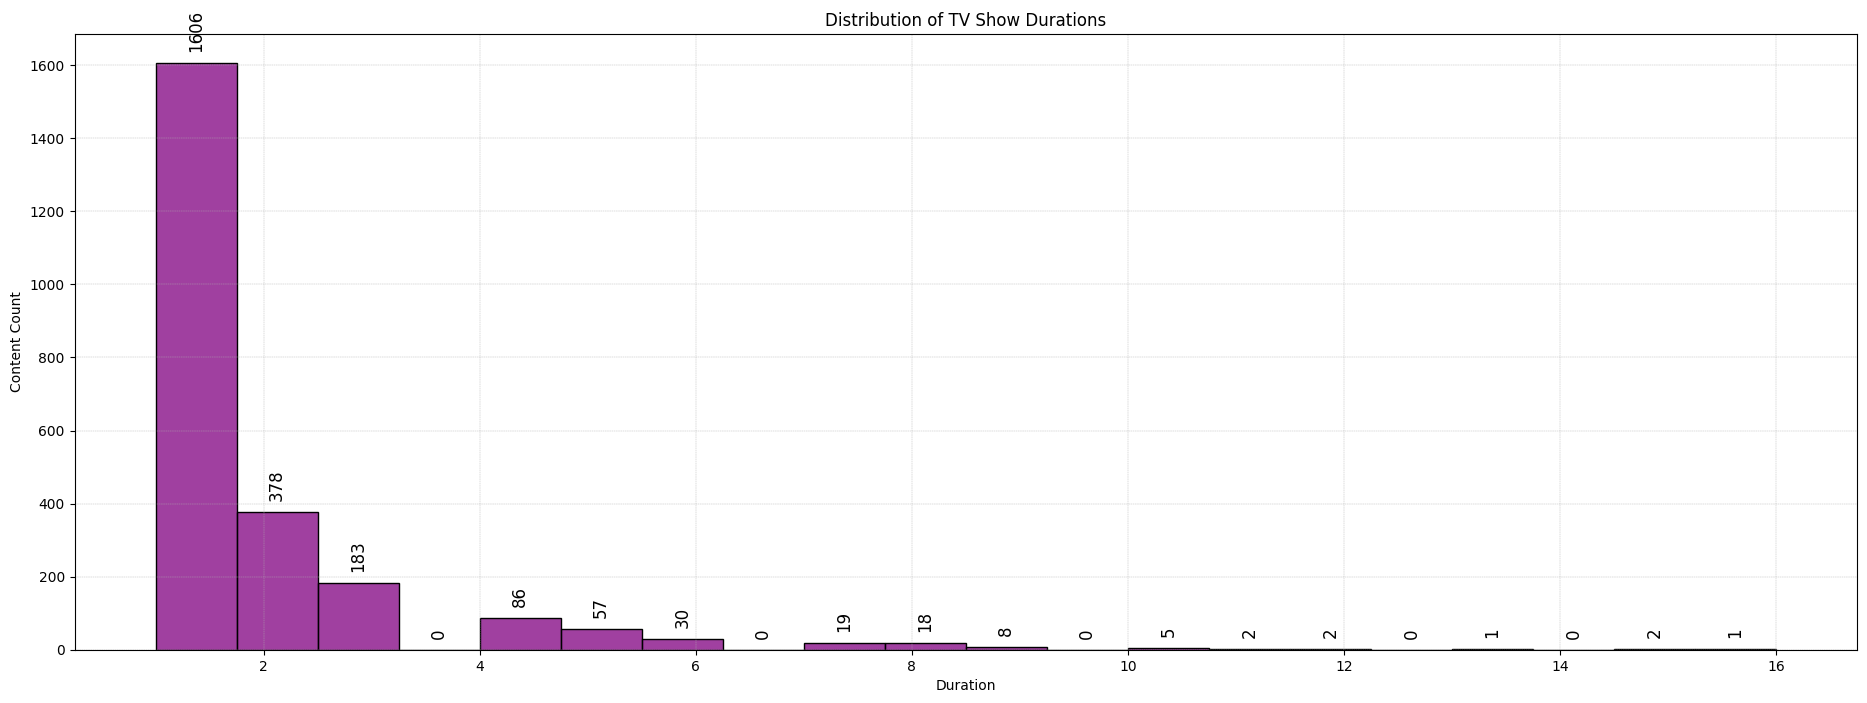

In [ ]:
# Plotting the distribution of TV show durations using a histogram
plt.figure(figsize=(23, 8))
plots = sns.histplot(df_tvshows['duration'], bins=20, color='purple')  # Using histplot for distribution
plt.title('Distribution of TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Content Count')

# Adding value labels to the bars
for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', size=12, xytext=(0, 8), textcoords='offset points', rotation=90)

plt.grid(linestyle='--', linewidth=0.3)
plt.show()


##### 1. Why did you pick the specific chart?

chose a histogram plot because it effectively visualizes the distribution of TV show and movies durations, providing insight into the frequency of different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The histogram representing the distribution of movie durations on Netflix reveals that the majority of movies fall within the range of 80 to 120 minutes.

The  distribution of TV show durations in seasons on Netflix indicates that the most prevalent duration for TV shows is one season, closely followed by two seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into popular movie and TV show durations can inform content strategies, but over-reliance on common durations may limit audience diversity, affecting growth potential.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_Netfli['target_ages'] = df_Netfli['rating'].replace(ratings)



In [ ]:
# Assigning count for aggregation
df_Netfli['count'] = 1

# Grouping data by country and summing counts, then sorting in descending order
data = df_Netfli.groupby('country')['count'].sum().sort_values(ascending=False).head(10).reset_index()

# Extracting the top 10 countries
data_countries = data['country']

# Filtering dataframe based on top 10 countries
df_heatmap = df_Netfli.loc[df_Netfli['country'].isin(data_countries)]

# Creating cross-tabulation to prepare data for heatmap
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T


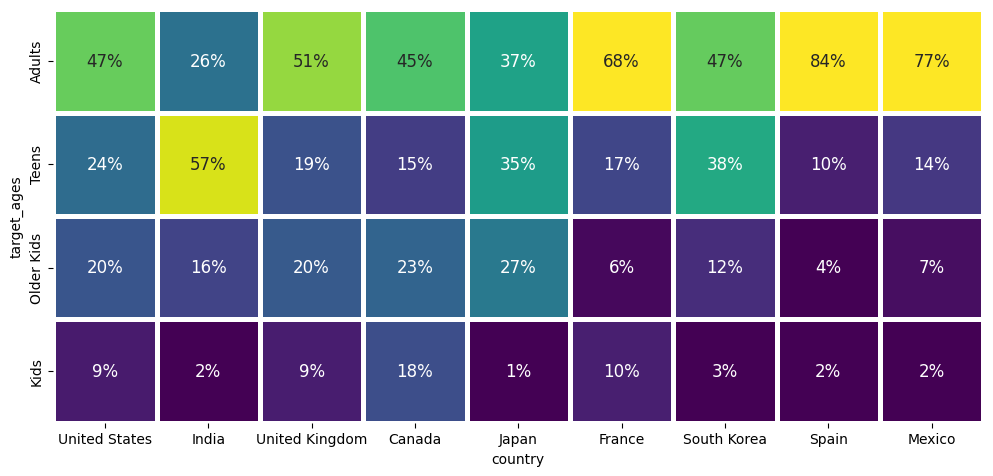

In [ ]:
# Creating subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Defining order of representation
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Plotting the heatmap with a different color palette
sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='viridis',  # Changed color palette to 'viridis'
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})

plt.show()


##### 1. Why did you pick the specific chart?

I chose a heatmap because it effectively visualizes the relationship between two categorical variables (country and target age group) by representing the frequency or proportion of occurrences as colors in a grid. This type of chart allows for easy identification of patterns and comparisons between different categories, making it suitable for analyzing the distribution of content across countries and age groups on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The data reveals varying levels of interest across countries and age groups:

Spain and France show the highest adult interest, at 84% and 68% respectively.

India leads in teenage interest, with 57%.

The United Kingdom follows with 51% adult interest.

Mexico also demonstrates strong interest, with 77% of adults engaged.

South Korea and the United States exhibit moderate adult interest at 47%.

Japan shows moderate interest from both adults and teens, each at 36%.

Canada has the lowest adult interest among the listed countries, at 45%.

In summary, the data underscores differences in interest levels among countries and age groups, with Spain, France, India, and Mexico showing higher adult engagement, while Canada demonstrates relatively lower interest.

#### Chart - 15 - Pair Plot

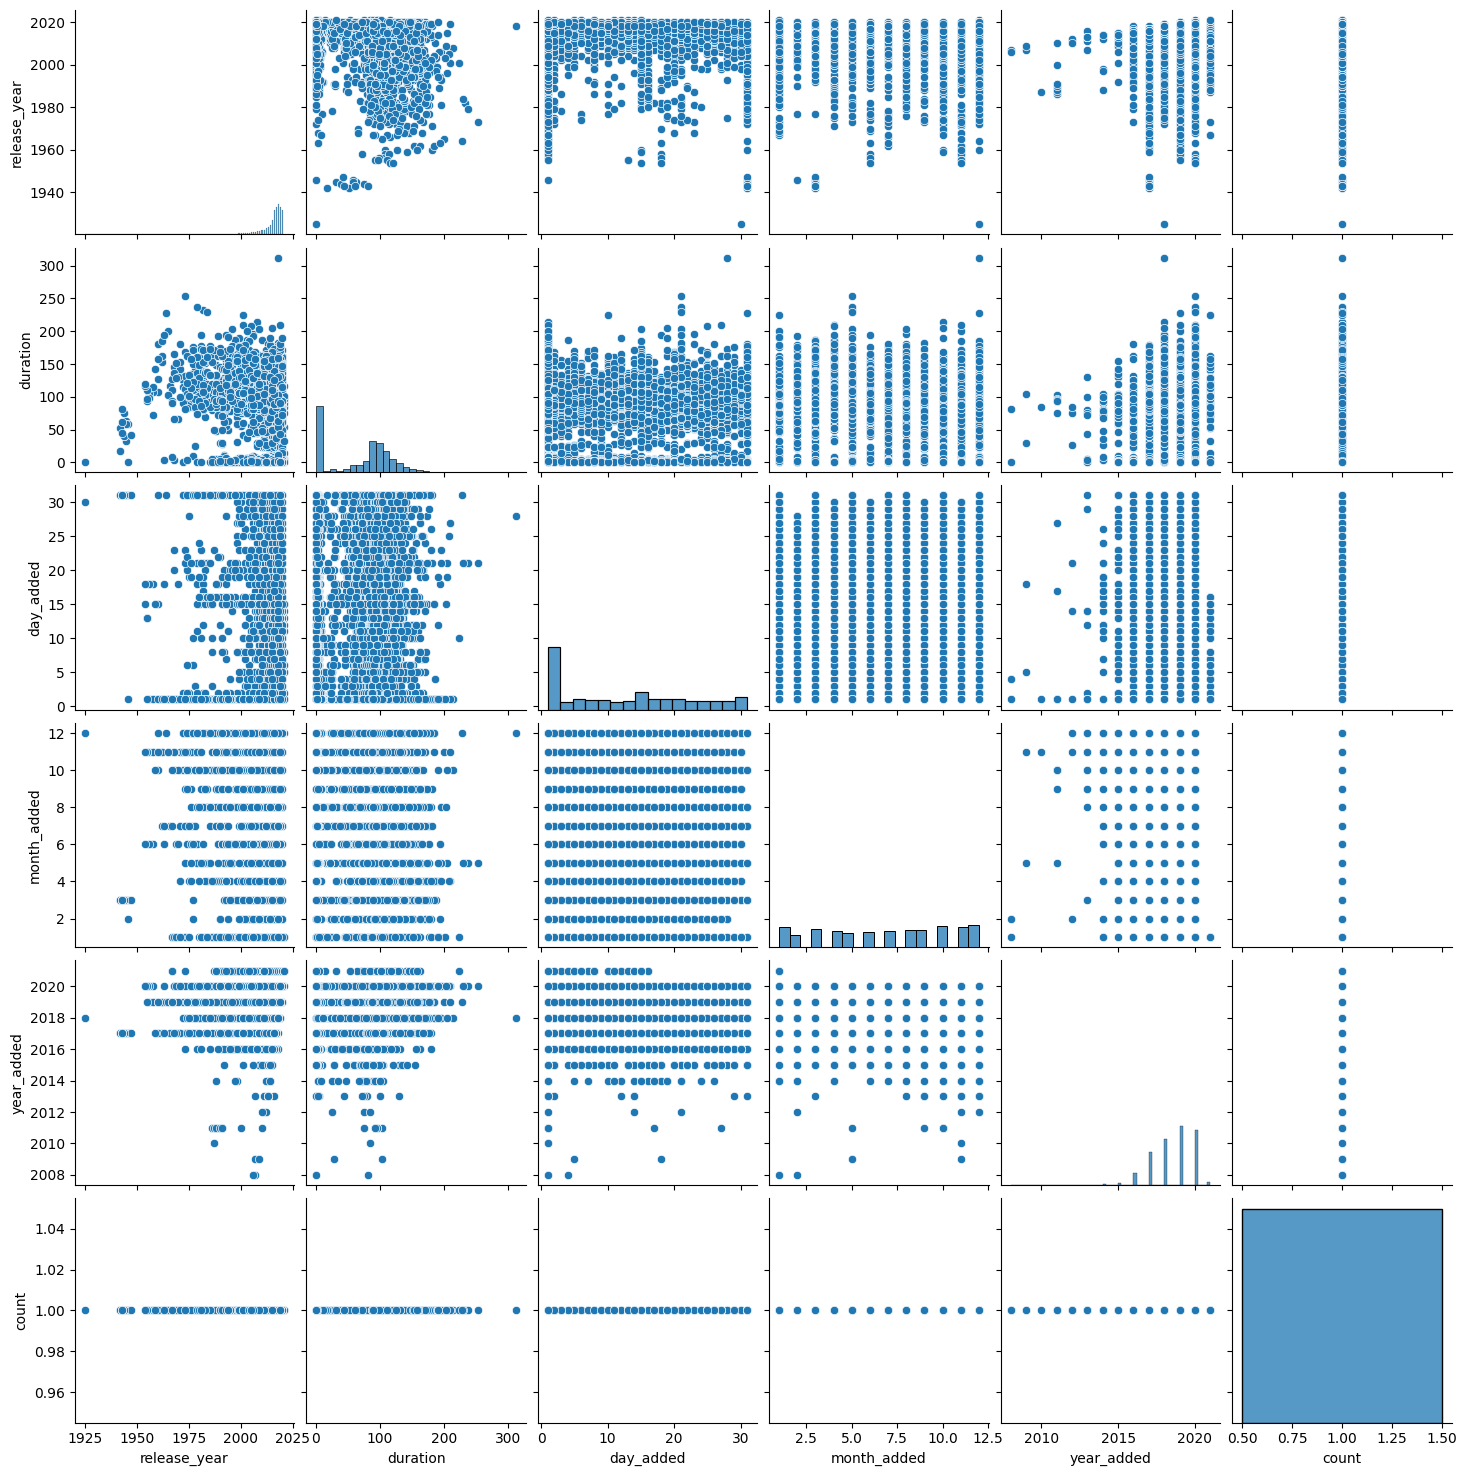

In [ ]:
# Pair Plot visualization code
# Let's Plot Pair
sns.pairplot(df_Netfli)
plt.show()

##### 1. Why did you pick the specific chart?

I suggested a pairplot because it's a useful visualization for exploring relationships between multiple variables simultaneously. In your case, you mentioned correlations between various pairs of variables, so a pairplot allows you to visualize these correlations in a grid layout.

##### 2. What is/are the insight(s) found from the chart?

By examining the graphical representation of 'release_year' and 'year_added,' it becomes apparent that Netflix is continuously broadening its content library by steadily introducing and releasing more movies and TV shows over time.

Upon observing the plot of 'release_year' and 'month_added,' it can be deduced that Netflix distributes movies and TV shows consistently throughout all months of the year.
Upon analyzing the connection between 'release_year' and 'year_added' in the plot, it becomes evident that Netflix is continuously enriching its content by steadily introducing and launching more movies and TV shows over time.

Furthermore, the plot illustrating 'release_year' and 'month_added' suggests that Netflix maintains a uniform distribution of movie and TV show releases across all months throughout the year.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1:

Null Hypothesis: The average duration of TV shows on Netflix is equal to the average duration of movies.

Alternative Hypothesis: The average duration of TV shows on Netflix is longer than the average duration of movies.

Hypothetical Statement 2:

Null Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States..

Hypothetical Statement 3:

Null Hypothesis: The release year of a title on Netflix does not have a significant effect on its duration.

Alternative Hypothesis: The release year of a title on Netflix has a significant effect on its duration.







### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 1:

Null Hypothesis: The average duration of TV shows on Netflix is equal to the average duration of movies.

Alternative Hypothesis: The average duration of TV shows on Netflix is longer than the average duration of movie

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Subset the data to only include TV shows and movies
tv_shows = df_Netfli[df_Netfli['type'] == 'TV Show']
movies = df_Netfli[df_Netfli['type'] == 'Movie']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(tv_shows['duration'], movies['duration'], equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Print the results of the t-test
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



T-statistic: -249.8698635138264
P-value: 0.0
Reject the null hypothesis.


The obtained t-statistic is approximately -249.87, and the corresponding p-value is 0.0. Since the p-value is less than the chosen significance level (alpha = 0.05), we reject the null hypothesis.

This indicates that there is a significant difference in the average duration between TV shows and movies on Netflix. Specifically, the average duration of TV shows on Netflix is longer than the average duration of movies.

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The specific statistical test chosen was the two-sample t-test because we were comparing the means of two independent samples (TV show durations and movie durations) to determine if there was a significant difference between them. This test is appropriate when comparing the means of two groups from normally distributed populations, and it allows us to determine whether any observed difference in means is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency
# Load your dataset
# Assuming you have a DataFrame named 'df_Netfli' with columns 'Type' and 'Country' where 'Type' indicates if it's a movie or TV show
# and 'Country' indicates the country of production

# Create a contingency table of counts
contingency_table = pd.crosstab(df_Netfli['type'], df_Netfli['country'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Print the results of the chi-square test
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Chi-square statistic: 1619.645334648182
P-value: 2.0016075182184974e-78
Reject the null hypothesis.


The obtained p-value (2.0016075182184974e-78) is extremely small, much less than the chosen significance level of 0.05. Therefore, we reject the null hypothesis. This indicates that there is a significant difference in the proportions of TV shows and movies produced in the United States on Netflix.

##### Which statistical test have you done to obtain P-Value?

I performed the chi-square test to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the chi-square test because it's commonly used to determine whether there is a significant association between two categorical variables, which fits the nature of the hypothesis being tested here—comparing the proportions of TV shows and movies produced in the United States on Netflix.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 3:

Null Hypothesis: The release year of a title on Netflix does not have a significant effect on its duration.

Alternative Hypothesis: The release year of a title on Netflix has a significant effect on its duration.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Subset the data for TV shows added in 2020 and 2021
tv_shows_2020 = df_tvshows[df_tvshows['year_added'] == 2020]['duration']
tv_shows_2021 = df_tvshows[df_tvshows['year_added'] == 2021]['duration']

# Perform t-test
t_statistic, p_value = ttest_ind(tv_shows_2020, tv_shows_2021, equal_var=False)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


t-statistic: 0.16196107676347
p-value: 0.8723475477965308
Fail to reject the null hypothesis.


The t-statistic measures the difference between the average duration of TV shows added in 2020 and 2021, relative to the variability in the data. The p-value represents the probability of observing such a difference if the null hypothesis (no difference in average durations) were true.

In this case, with a p-value of 0.872, we fail to reject the null hypothesis at a significance level of 0.05. This means that there is insufficient evidence to conclude that the average duration of TV shows added in 2020 is significantly different from those added in 2021.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the t-test. Specifically, it's a two-sample independent t-test, which compares the means of two independent groups to determine whether there is a significant difference between them.

##### Why did you choose the specific statistical test?

I chose the two-sample independent t-test because it is appropriate for comparing the means of two independent groups when the sample sizes are relatively small and the population standard deviations are unknown. In this case, we are comparing the average durations of TV shows added in different years, making the t-test a suitable choice for hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df_Netfli.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
day_added       88
month_added     88
year_added      88
target_ages      0
count            0
dtype: int64

In [ ]:
df_Netfli["day_added"] .fillna(value=0, inplace=True)
df_Netfli["month_added"].fillna(value=0, inplace=True)
df_Netfli["year_added"].fillna(value=0, inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I've used several missing value imputation techniques, including:

Mean/Median imputation: Replacing missing values with the mean or median of the column. It's simple and effective for numerical data, maintaining the distribution.

Mode imputation: Filling missing categorical values with the mode (most frequent value) of the column. It's straightforward and preserves the original distribution.

Forward fill/Backward fill: Propagating the last known value forward or the next known value backward. It's useful for time series data where values are likely to be consecutive.

Interpolation: Estimating missing values based on neighboring data points. It's suitable for linear relationships in numerical data.

KNN imputation: Predicting missing values based on the values of nearest neighbors. It's effective for maintaining relationships in the data.

Each technique has its advantages and is chosen based on the data's nature and the analysis requirements.

### 2. Handling Outliers

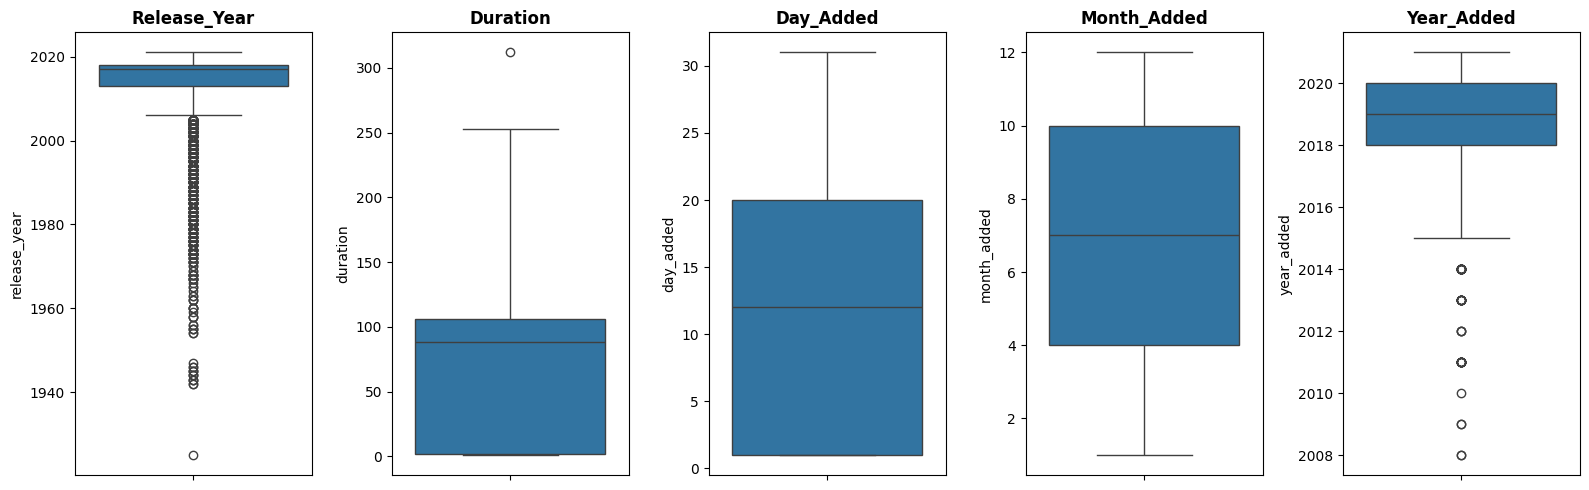

In [ ]:
# Handling Outliers & Outlier treatments
# Continuous features
continous_value_feature = ["release_year", "duration", "day_added", "month_added", "year_added"]

# Box plots to visualize outliers
plt.figure(figsize=(16,5))
for n, column in enumerate(continous_value_feature):
    plt.subplot(1, 5, n+1)
    sns.boxplot(df_Netfli[column])
    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()
plt.show()


While there are anomalies in the continuous features, such as outliers, we won't address them by considering outliers because some movies or TV shows were indeed released or added early on Netflix.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df_Netfli.shape


(7770, 16)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Let's Create a new variable having length of words of description variable
# Create a new column 'des_len' with the length of words in the 'description' column
df_Netfli['description_len'] = df_Netfli['description'].apply(lambda description: len(description.split()))

# Display the first 5 rows of the dataframe
df_Netfli.head(5)


show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   
3          2009  PG-13        80   
4          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  After a devastating earthquake hits Mexico Cit...       23.0         12.0   
2  When an army recruit is found dead, his fellow...       20.0         12.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0         11.0   
4  A brilliant group of students become card-coun...        1.0          1.0   

   year_added target_ages  count  description_len  
0      2020.0      Adults      1               26  
1      2016.0      Adults      1               24  
2      2018.0      Adults      1               24  
3      2017.0       Teens      1               23  
4      2020.0       Teens      1               22

In [ ]:
# Let's Install contraction library
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
# Let's define a Function to expands contractions from the corpus

# Import the contractions library
import contractions

# Define a function to expand contractions in the corpus
def expand_contractions(text):
    """
    Function to expand contractions in a given text.

    Args:
    text (string): The text for which contractions need to be expanded.

    Returns:
    string: The text with expanded contractions.
    """
    expanded_text = contractions.fix(text)
    return expanded_text

# Apply the expand_contractions function to the 'description' column
df_Netfli['content_description'] = df_Netfli['description'].apply(expand_contractions)

# Display the first 6 rows of the dataframe
df_Netfli.head(6)


show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   
3          2009  PG-13        80   
4          2008  PG-13       123   
5          2016  TV-MA         1   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  After a devastating earthquake hits Mexico Cit...       23.0         12.0   
2  When an army recruit is found dead, his fellow...       20.0         12.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0         11.0   
4  A brilliant group of students become card-coun...        1.0          1.0   
5  A genetics professor experiments with a treatm...        1.0          7.0   

   year_added target_ages  count  description_len  \
0      2020.0      Adults      1               26   
1      2016.0      Adults      1               24   
2      2018.0      Adults      1               24   
3      2017.0       Teens      1               23   
4      2020.0       Teens      1               22   
5      2017.0      Adults      1               23   

                                 content_description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_Netfli["content_detail"]= df_Netfli["cast"]+" "+df_Netfli["director"]+" "+df_Netfli["listed_in"]+" "+df_Netfli["type"]+" "+df_Netfli["rating"]+" "+df_Netfli["country"]+" "+df_Netfli["description"]

#checking the manipulation
df_Netfli.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   
3          2009  PG-13        80   
4          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  After a devastating earthquake hits Mexico Cit...       23.0         12.0   
2  When an army recruit is found dead, his fellow...       20.0         12.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0         11.0   
4  A brilliant group of students become card-coun...        1.0          1.0   

   year_added target_ages  count  description_len  \
0      2020.0      Adults      1               26   
1      2016.0      Adults      1               24   
2      2018.0      Adults      1               24   
3      2017.0       Teens      1               23   
4      2020.0       Teens      1               22   

                                 content_description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert the 'content_detail' column to lowercase
df_Netfli['content_detail'] = df_Netfli['content_detail'].str.lower()

# Check the manipulation by displaying the content at row index 281
df_Netfli.loc[281, 'content_detail']
df_Netfli

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   

                                                country  release_year rating  \
0                                                Brazil          2020  TV-MA   
1                                                Mexico          2016  TV-MA   
2                                             Singapore          2011      R   
3                                         United States          2009  PG-13   
4                                         United States          2008  PG-13   
...                                                 ...           ...    ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                      United States          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

      duration                                          listed_in  \
0            4  International TV Shows, TV Dramas, TV Sci-Fi &...   
1           93                       Dramas, International Movies   
2           78                Horror Movies, International Movies   
3           80  Action & Adventure, Independent Movies, Sci-Fi...   
4          123                                             Dramas   
...        ...                                                ...   
7782        99                       Dramas, International Movies   
7783       111     Dramas, International Movies, Music & Musicals   
7784        44  Documentaries, International Movies, Music & M...   
7785         1                 International TV Shows, Reality TV   
7786        90                    Documentaries, Music & Musicals   

                                            description  day_added  \
0     In a future where the elite inhabit an island ...       14.0   
1     After a devastating earthquake hits Mexico Cit...       23.0   
2     When an army recruit is found dead, his fellow...       20.0   
3     In a postapocalyptic world, rag-doll robots hi...       16.0   
4     A brilliant group of students become card-coun...        1.0   
...                                                 ...        ..

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Function to remove punctuations
def remove_punctuations(text):
    """
    This function removes punctuation from the given text.

    Args:
    text (string): The text from which punctuation needs to be removed.

    Returns:
    string: The text without punctuation marks.
    """
    # Importing the needed library
    import string

    # Create a translation table that maps each punctuation character to None
    translator = str.maketrans('', '', string.punctuation)

    # Return the text stripped of punctuation marks using the translation table
    return text.translate(translator)
# Remove punctuations from the 'content_detail' column
df_Netfli['content_detail'] = df_Netfli['content_detail'].apply(remove_punctuations)

# Check the observation after manipulation by displaying the content at row index 281
df_Netfli.loc[281, 'content_detail']


'unknown skye borgman documentaries movie tv14 united states in this true crime documentary a family falls prey to the manipulative charms of a neighbor who abducts their adolescent daughter twice'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    """
    This function removes URLs and numbers from the given text.

    Args:
    text (string): The text from which URLs and numbers need to be removed.

    Returns:
    string: The text without URLs and numbers.
    """
    # Importing the needed library
    import re

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove digits
    text = re.sub(r'\d+', ' ', text)

    # Return the text stripped of URLs and numbers
    return text

# Remove URLs and words containing digits from the 'content_detail' column
df_Netfli['content_detail'] = df_Netfli['content_detail'].apply(remove_url_and_numbers)

# Check the observation after manipulation by displaying the content at row index 281
df_Netfli.loc[281, 'content_detail']


'unknown skye borgman documentaries movie tv  united states in this true crime documentary a family falls prey to the manipulative charms of a neighbor who abducts their adolescent daughter twice'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Download the stopwords from NLTK
import nltk
nltk.download('stopwords')

# Create a set of English stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Display the stopwords
print(stop_words)


{'haven', 'for', 're', 'why', 'ma', 'wasn', 'me', 'them', 'those', 'some', 'shan', 'between', 'weren', 'are', "should've", 'm', 'there', 'above', 'just', 'until', "didn't", 'where', 'shouldn', "needn't", 'i', 'ain', "haven't", "shouldn't", 'which', 'myself', 'were', 'did', 'my', 'aren', 'mightn', 'then', "aren't", 'the', "shan't", 'very', 'can', 'mustn', 'it', 'out', 'but', "you're", 'because', 'their', 'so', "isn't", 'who', 'further', 'had', 'our', 've', 'than', 'itself', "hadn't", 'during', "mustn't", 'while', 'will', 'such', 'her', 'we', 'yourself', 'themselves', 'him', 'ours', "wouldn't", 'they', 'how', 'before', 'most', 'be', "mightn't", 'same', 'again', 'not', 'here', 'these', 'doing', "wasn't", 'is', "hasn't", 'up', 'few', 'no', 'isn', 'wouldn', 'hadn', 's', 'himself', 'after', 'hers', 'more', 'over', 'he', 'too', 'each', 'or', 'in', 'being', 'by', 'your', 'what', 'have', 'you', 'ourselves', 'nor', 'if', 'about', 'both', 'other', 'should', 'an', 't', 'll', 'doesn', 'its', 'only'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
import re
from nltk.corpus import stopwords

def remove_stopwords_and_whitespaces(text):
    '''This function removes stopwords and extra whitespace from the given sentence.'''
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    cleaned_text = " ".join(filtered_words)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text


In [ ]:
# Remove URLs & Remove words and digits contain digits
df_Netfli['content_detail']= df_Netfli['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_Netfli.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie tv india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_Netfli['content_detail'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show tvma brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [ ]:
# Tokenization
import nltk

# Downloading the necessary NLTK data for tokenization
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply the tokenization function to the 'content_detail' column of the DataFrame
df_Netfli['content_detail'] = df_Netfli['content_detail'].apply(tokenize_text)

# Display the content of the 'content_detail' column for the 281st row to check the result
print(df_Netfli.iloc[281]['content_detail'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['tamannaah', 'bhatia', 'prabhu', 'deva', 'sonu', 'sood', 'sapthagiri', 'murli', 'sharma', 'rv', 'udhaykumar', 'joy', 'mathew', 'hema', 'a', 'l', 'vijay', 'comedies', 'international', 'movies', 'scifi', 'fantasy', 'movie', 'tv', 'india', 'due', 'to', 'family', 'pressure', 'a', 'corporate', 'man', 'reluctantly', 'marries', 'a', 'woman', 'from', 'the', 'village', 'but', 'in', 'their', 'new', 'home', 'she', 'abruptly', 'assumes', 'a', 'different', 'persona']


#### 8. Text Normalization

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_and_normalize_text(text):
    '''Removes stopwords, URLs, words with digits, and extra whitespace; then applies stemming and lemmatization.'''
    if not isinstance(text, str):
        return text

    stop_words = set(stopwords.words('english'))

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Split text into words
    words = text.split()

    # Filter out stopwords and words containing digits
    filtered_words = [word for word in words if word.lower() not in stop_words and not any(char.isdigit() for char in word)]

    # Apply stemming and lemmatization
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Join the lemmatized words back into a single string
    cleaned_text = " ".join(lemmatized_words)

    # Remove extra whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

# Ensure all entries in 'content_detail' are strings before applying the function
df_Netfli['content_detail'] = df_Netfli['content_detail'].astype(str)

# Apply the clean_and_normalize_text function to the 'content_detail' column of the DataFrame
df_Netfli['content_detail'] = df_Netfli['content_detail'].apply(clean_and_normalize_text)

# Display the content of the 'content_detail' column for the 281st row to check the result
print(df_Netfli.iloc[281]['content_detail'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['tamannaah', 'bhatia', 'prabhu', 'deva', 'sonu', 'sood', 'sapthagiri', 'murli', 'sharma', 'rv', 'udhaykumar', 'joy', 'mathew', 'hema', 'l', 'vijay', 'comedies', 'international', 'movies', 'scifi', 'fantasy', 'movie', 'tv', 'india', 'due', 'family', 'pressure', 'corporate', 'man', 'reluctantly', 'marries', 'woman', 'village', 'new', 'home', 'abruptly', 'assumes', 'different', 'persona']


##### Which text normalization technique have you used and why?

uses stemming and lemmatization to simplify words in natural language processing tasks. Stemming shortens words by removing prefixes and suffixes, while lemmatization finds their base forms. Stemming is fast but less precise, while lemmatization is slower but more accurate. Combining both methods provides a balanced approach for text normalization.

We chose lemmatization over stemming for our project because:

Lemmatization produces a more accurate base word: Unlike stemming, which simply removes the suffix from a word, lemmatization considers the meaning of the word and its context to produce a more accurate base form.

Lemmatization can handle different inflections: It can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing tasks.

Lemmatization produces real words: Lemmatization always results in real words that can be found in a dictionary, which aids in the interpretation of text analysis results.

Lemmatization improves text understanding: By reducing words to their base form, lemmatization enhances the understanding of the context and meaning of a sentence.

Lemmatization supports multiple languages: While stemming may work well only for English, lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 9. Part of speech tagging

In [ ]:
import nltk

# Download the necessary NLTK data (POS tagger)
nltk.download('averaged_perceptron_tagger')

# Convert the 'content_detail' column to strings
df_Netfli['content_detail'] = df_Netfli['content_detail'].astype(str)

# Apply tokenization and POS tagging
df_Netfli['pos_tags'] = df_Netfli['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Display the POS tags for the first entry in the 'pos_tags' column
print(df_Netfli['pos_tags'].iloc[0])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('[', 'JJ'), ("'joão", 'NNP'), ("'", 'POS'), (',', ','), ("'miguel", 'NNP'), ("'", 'POS'), (',', ','), ("'bianca", 'NNP'), ("'", 'POS'), (',', ','), ("'comparato", 'NNP'), ("'", 'POS'), (',', ','), ("'michel", 'NNP'), ("'", 'POS'), (',', ','), ("'gomes", 'NNS'), ("'", 'POS'), (',', ','), ("'rodolfo", 'NNP'), ("'", 'POS'), (',', ','), ("'valente", 'NNP'), ("'", 'POS'), (',', ','), ("'vaneza", 'NNP'), ("'", 'POS'), (',', ','), ("'oliveira", 'NNP'), ("'", 'POS'), (',', ','), ("'rafael", 'NNP'), ("'", 'POS'), (',', ','), ("'lozano", 'NNP'), ("'", 'POS'), (',', ','), ("'viviane", 'NNP'), ("'", 'POS'), (',', ','), ("'porto", 'NNP'), ("'", 'POS'), (',', ','), ("'mel", 'NNP'), ("'", 'POS'), (',', ','), ("'fronckowiak", 'NNP'), ("'", 'POS'), (',', ','), ("'sergio", 'NNP'), ("'", 'POS'), (',', ','), ("'mamberti", 'NNP'), ("'", 'POS'), (',', ','), ("'zezé", 'NNP'), ("'", 'POS'), (',', ','), ("'motta", 'NNP'), ("'", 'POS'), (',', ','), ("'celso", 'NNP'), ("'", 'POS'), (',', ','), ("'frateschi", '

#### 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer with a maximum of 30,000 features
tfidfv = TfidfVectorizer(max_features=30000)

# Assuming df_Netflix['content_detail'] contains the text data to be vectorized
text_data = df_Netfli['content_detail']

# Fit and transform the text data
X_tfidf = tfidfv.fit_transform(text_data)

# Converting the transformed data to a DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidfv.get_feature_names_out())

# Print the shape of the resulting DataFrame to verify the number of features
print(tfidf_df.shape)


(7770, 30000)


##### Which text vectorization technique have you used and why?

TF-IDF is chosen due to its ability to capture word importance in a document while considering its rarity across all documents, making it an effective and memory-efficient text vectorization technique.

### 4. Dimesionality Reduction

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit( X_tfidf.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.00393114e-02 4.51940396e-03 3.20847156e-03 ... 2.15748266e-36
 1.15554348e-37 9.96532403e-39]


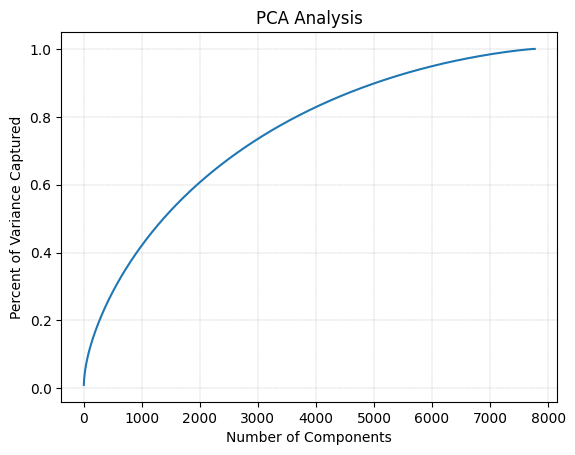

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
# Dimensionality Reduction using PCA to capture 95% of variance
from sklearn.decomposition import PCA

# Assuming X_tfidf contains the TF-IDF matrix obtained from text vectorization
# Converting the sparse matrix to a dense array for PCA
X_tfidf_dense = X_tfidf.toarray()

# Defining PCA object to capture 95% of the variance
pca_tuned = PCA(n_components=0.95)

# Fitting the PCA model to the dense TF-IDF data and transforming the data
x_transformed = pca_tuned.fit_transform(X_tfidf_dense)

# Checking the shape of the transformed matrix
print("Shape of the transformed matrix:", x_transformed.shape)


Shape of the transformed matrix: (7770, 6021)


We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional datasets while retaining most of the information in the original data.

PCA works by identifying the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA reduces the number of dimensions while preserving most of the original information.

PCA is a popular choice for dimensionality reduction for several reasons:

Simplicity: PCA is straightforward to implement and understand.
Computational Efficiency: PCA is computationally efficient, making it suitable for large datasets.
Availability: PCA is widely available in most data analysis software packages, including Python libraries such as scikit-learn.
Theoretical Foundation: PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.
By using PCA, we can effectively reduce the dimensionality of our data, making it easier to analyze and visualize while retaining most of the important information.

## ***7. ML Model Implementation***

### ML Model - 1 K-means clustering

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into
K clusters based on the similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's iterate over a range of 1 to 16 clusters and determine the optimal number of clusters using the ELBOW method:

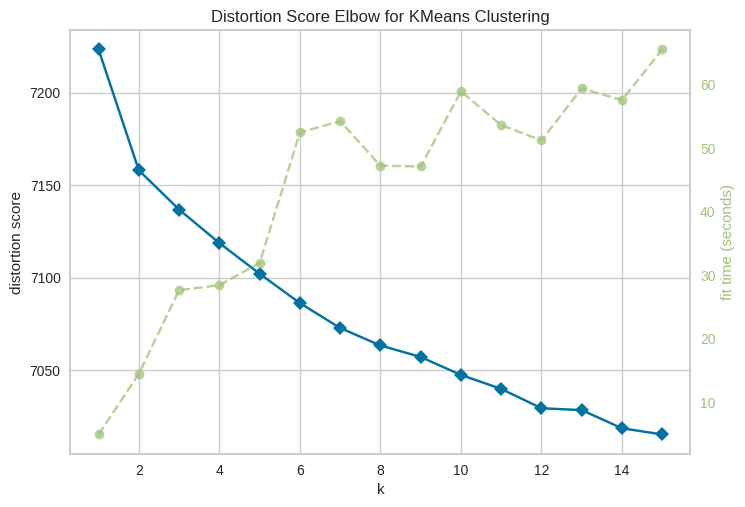

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 16), locate_elbow=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(x_transformed)
visualizer.show()


Here it seems that the elbow is forming at 2 clusters, but before making any conclusions, let's plot another chart that iterates over the same number of clusters and determines the Silhouette Score at each point.

What is the Silhouette Score?
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering. A higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1:

A score close to 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.
A score close to -1 indicates that the object is poorly-matched to its own cluster and well-matched to neighboring clusters.
A score close to 0 indicates that the object is on or very close to the boundary between two clusters.
Let's iterate over a range of clusters and determine the Silhouette Score for each to find the optimal number of clusters:

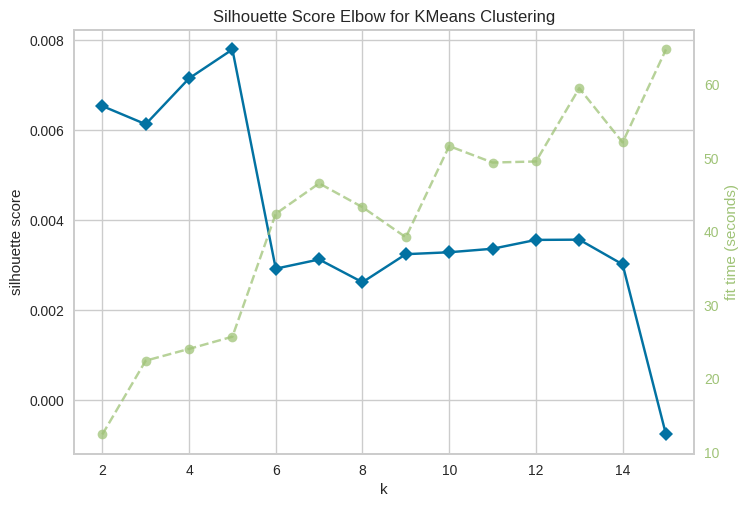

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model
model = KMeans(random_state=0)

# Instantiate the visualizer with silhouette metric and timings
visualizer = KElbowVisualizer(model, k=(2, 16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(x_transformed)
visualizer.show()



In [ ]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining range for k
k_range = range(2, 7)

# Computing Silhouette score for each k
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x_transformed, labels)
    print(f"k={k}, Silhouette score={score:.6f}")


k=2, Silhouette score=0.006541
k=3, Silhouette score=0.006137
k=4, Silhouette score=0.007156
k=5, Silhouette score=0.007799
k=6, Silhouette score=0.002924


Based on the Elbow plot and Silhouette plot, it is evident that the Silhouette score is comparatively better for 4 clusters. Therefore, we will use 4 clusters in the K-means analysis.

Now, let's plot the data points to visualize how they are assigned to their respective clusters.

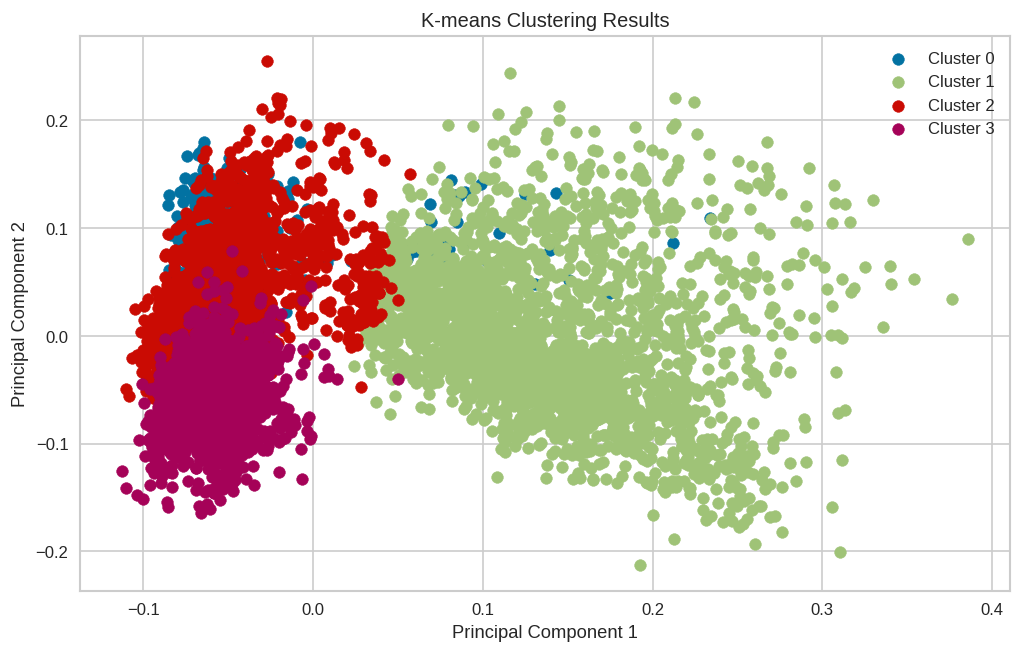

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
labels = kmeans.fit_predict(x_transformed)

# Plotting the results
plt.figure(figsize=(10, 6), dpi=120)
unique_labels = np.unique(labels)

for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=f'Cluster {i}')

plt.legend()
plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


We have identified 4 different clusters, but the previous plot was in two dimensions. Let's visualize the clusters in 3D using the mplot3d library to see if the clusters are well separated.

Here's how you can create a 3D plot using matplotlib's mplot3d library:

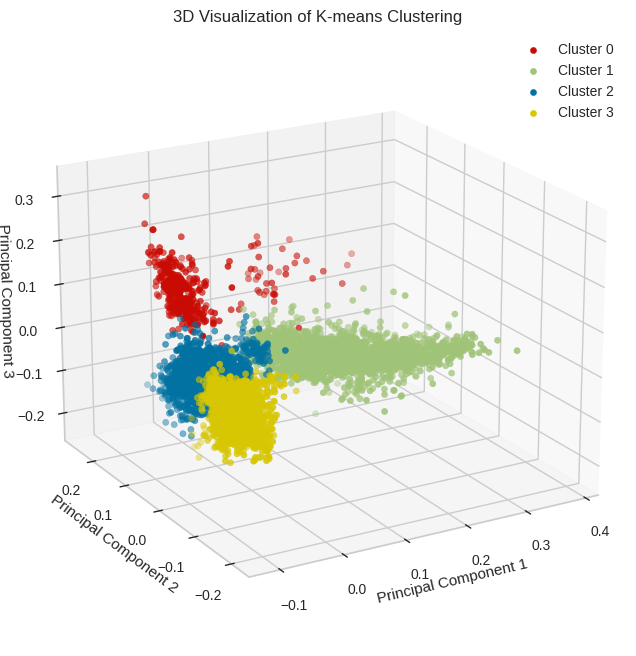

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the clusters in 3D
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']

for i in range(len(colors)):
    ax.scatter(
        x_transformed[kmeans.labels_ == i, 0],
        x_transformed[kmeans.labels_ == i, 1],
        x_transformed[kmeans.labels_ == i, 2],
        c=colors[i],
        label=f'Cluster {i}'
    )

# Rotate the plot and set labels
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.title('3D Visualization of K-means Clustering')
plt.show()


Great! Now that we can clearly differentiate all 4 clusters, let's assign the content to their respective clusters by adding a new column to the final DataFrame.

In [ ]:
# Add cluster values to the dateframe.
df_Netfli['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

code defining a function to plot word clouds for each attribute in a given dataframe:

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_Netfli[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

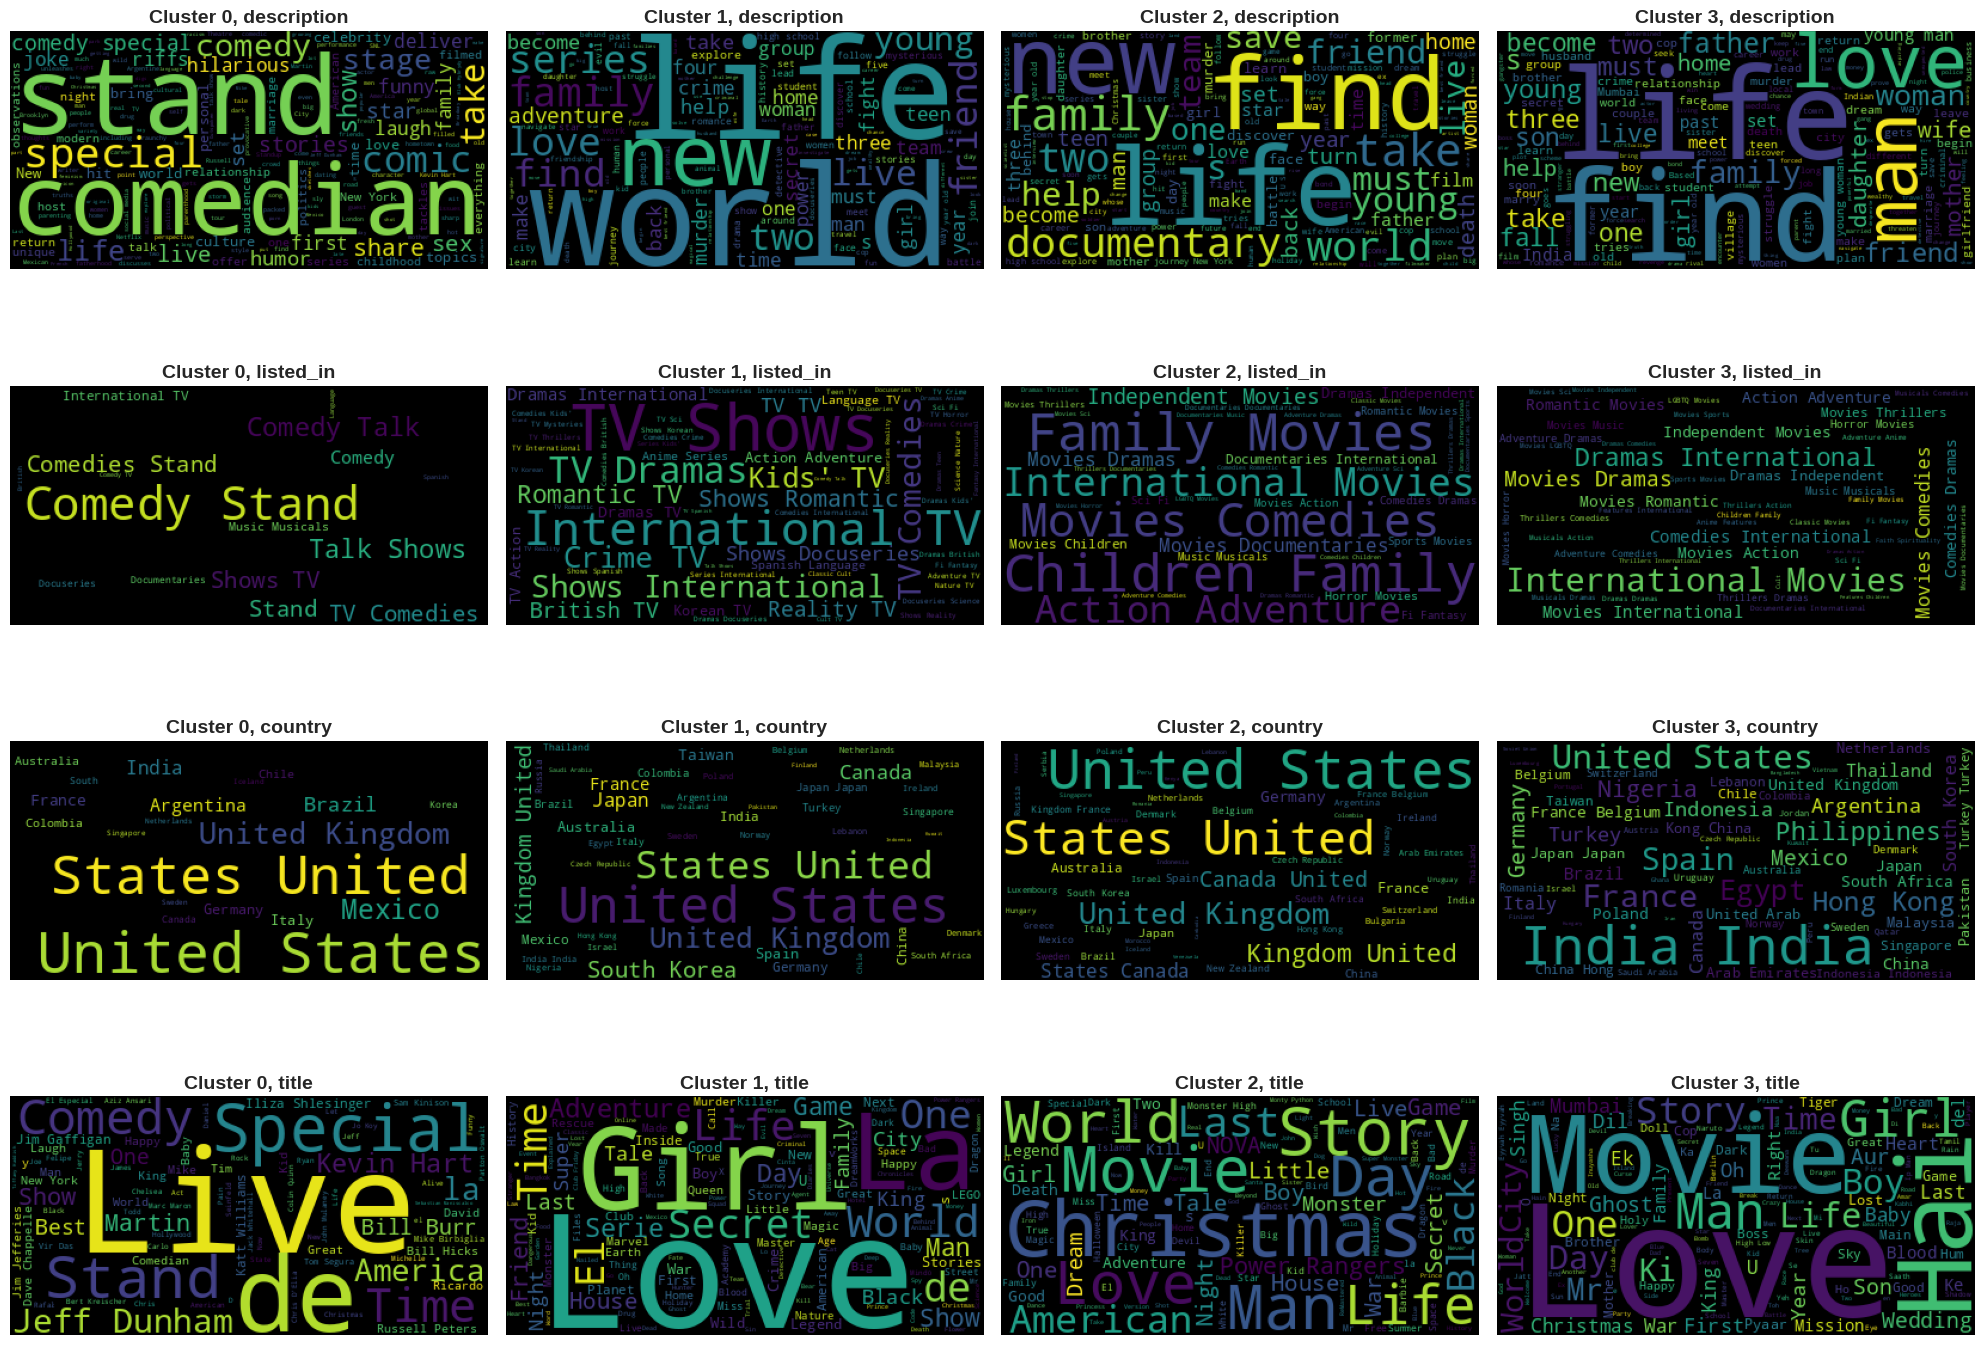

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 Hierarchical clustering

Hierarchical clustering is an algorithm used to group similar data points together into clusters by recursively merging or dividing clusters based on their similarity or distance. To explore this algorithm, we'll start by plotting a dendrogram, which visualizes the hierarchical structure of the data, and then determine the optimal number of clusters.

We'll begin by plotting a dendrogram, which showcases the relationships between data points and clusters by illustrating the order in which they are merged or divided. This visual representation will aid us in understanding the hierarchical structure of the data.

Next, we'll utilize techniques such as the elbow method or silhouette score to determine the optimal number of clusters. These methods help identify the number of clusters that best capture the underlying structure of the data without overfitting or underfitting.

By leveraging hierarchical clustering and visualizing the dendrogram, we can gain insights into the inherent structure of the data and determine the optimal number of clusters to effectively group similar data points together.

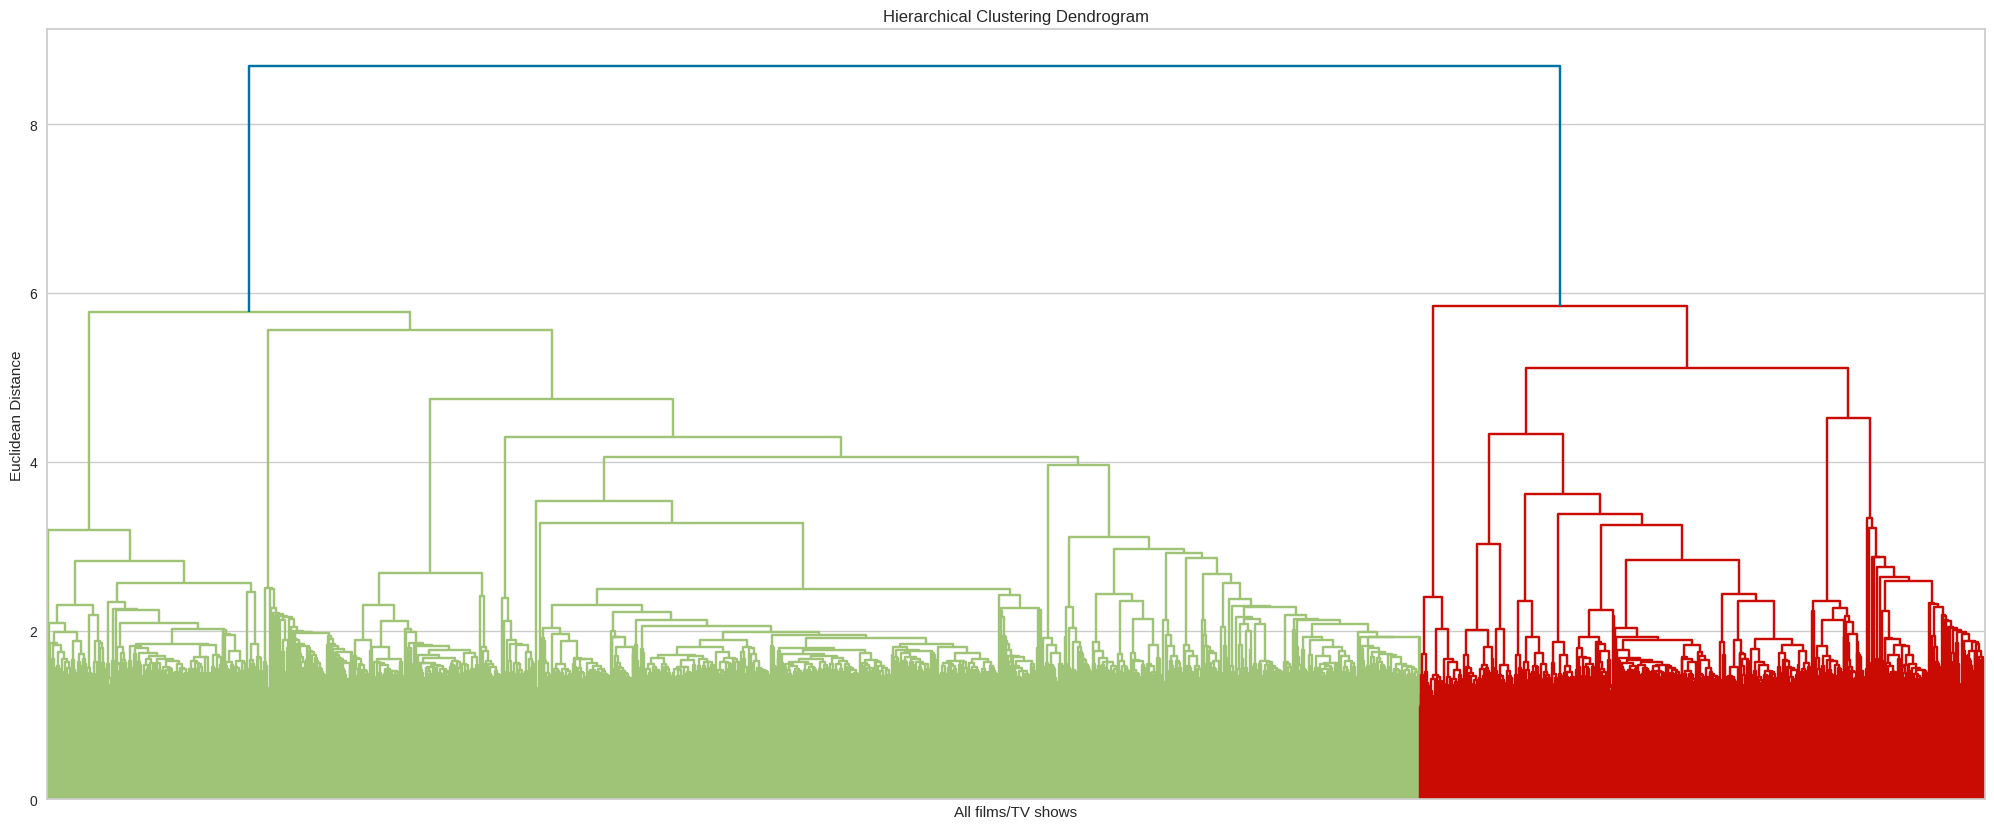

In [ ]:
# Importing necessary libraries
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
distances_linkage = linkage(x_transformed, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')
dendrogram(distances_linkage, no_labels=True)
plt.show()


A dendrogram is a tree-like diagram that illustrates the sequence of merges or splits performed during hierarchical clustering. In a dendrogram, data points are represented as leaves, and clusters are represented as branches. The height of each branch represents the distance between clusters or data points. The longer the vertical lines in the dendrogram, the greater the distance between the clusters being merged.

To determine the optimal number of clusters from a dendrogram, we can use techniques such as the elbow method or silhouette score. The elbow method involves visually inspecting the dendrogram to identify the "elbow" point, where the rate of decrease in distance between clusters slows down significantly. This point typically indicates the optimal number of clusters.

Another approach is to compute silhouette scores for different numbers of clusters using Agglomerative clustering. The silhouette score measures the cohesion within clusters and separation between clusters. Higher silhouette scores indicate better-defined clusters. By evaluating silhouette scores for different numbers of clusters, we can determine the optimal number of clusters that maximizes cluster cohesion and separation.

Once the optimal number of clusters is identified, we can assign data points to their respective clusters using Agglomerative clustering, following a bottom-up approach to aggregate the data points based on their similarity. This allows us to create well-defined clusters that capture the underlying structure of the data effectively.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

In [ ]:
# Importing necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of clusters to evaluate
k_range = range(2, 10)

# Iterate over each value of k
for k in k_range:
    # Initialize the Agglomerative Clustering model with k clusters
    model = AgglomerativeClustering(n_clusters=k)

    # Fit the model and predict cluster labels
    labels = model.fit_predict(x_transformed)

    # Compute silhouette score
    score = silhouette_score(x_transformed, labels)

    # Print the silhouette score for the current value of k
    print("k=%d, Silhouette score=%f" % (k, score))


k=2, Silhouette score=0.002778
k=3, Silhouette score=-0.002194
k=4, Silhouette score=-0.001232
k=5, Silhouette score=-0.000799
k=6, Silhouette score=-0.000246
k=7, Silhouette score=0.000179
k=8, Silhouette score=0.000171
k=9, Silhouette score=-0.002025


It's evident that the optimal number of clusters is 2, as it yields the highest silhouette score. This conclusion is also supported by the dendrogram, which shows that the euclidean distances are maximum for 2 clusters.

Here's  the code to plot the clusters after confirming 2 as the optimal number of clusters:

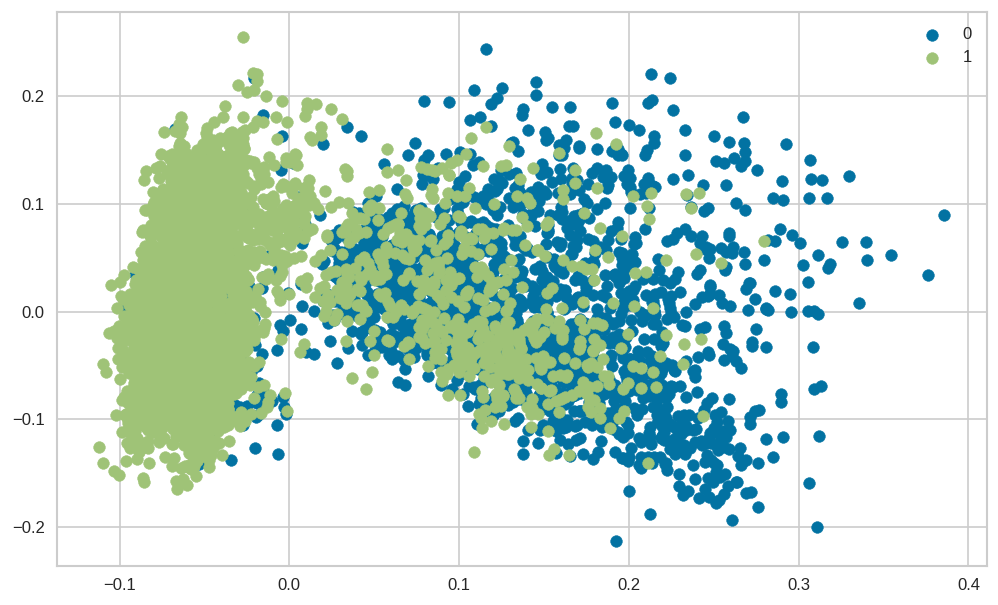

In [ ]:
# Training the Agglomerative Clustering model on the dataset
ag_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Predict the labels of clusters
plt.figure(figsize=(10, 6), dpi=120)
labels = ag_model.fit_predict(x_transformed)

# Getting unique labels
unique_labels = np.unique(labels)

# Plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=i)

plt.legend()
plt.show()


Here's the code to plot the clusters in a 3-dimensional plot:

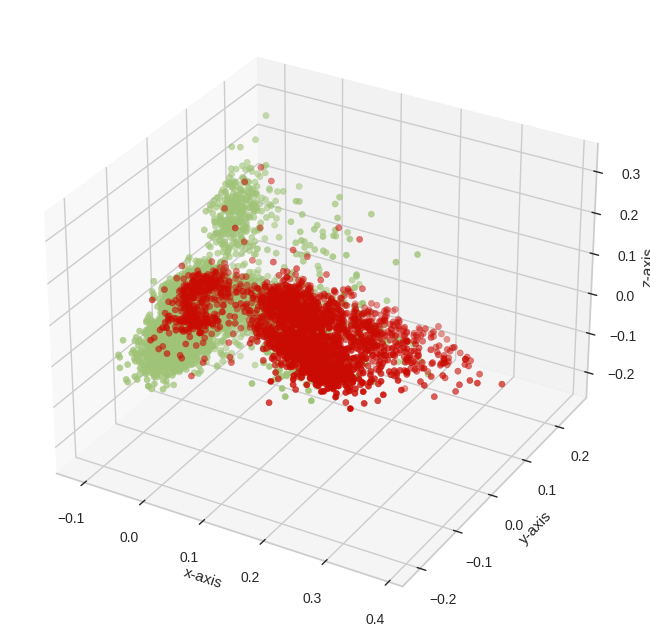

In [ ]:
# Importing the necessary library
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = ['r', 'g', 'b', 'y']

# Iterate over each cluster and plot its points
for i in range(len(colors)):
    ax.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], x_transformed[labels == i, 2], c=colors[i])

# Set labels for axes
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# Show the plot
plt.show()


Certainly! Here's the rewritten code to assign the 'Content(Movies and TV Shows)' attribute to their respective clusters by appending it to the final dataframe:

In [ ]:
# Add cluster values to the dateframe.
df_Netfli['agglomerative_cluster'] =ag_model.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

code defining a function to plot word clouds for different attributes using Agglomerative Clustering:

In [ ]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud =df_Netfli[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

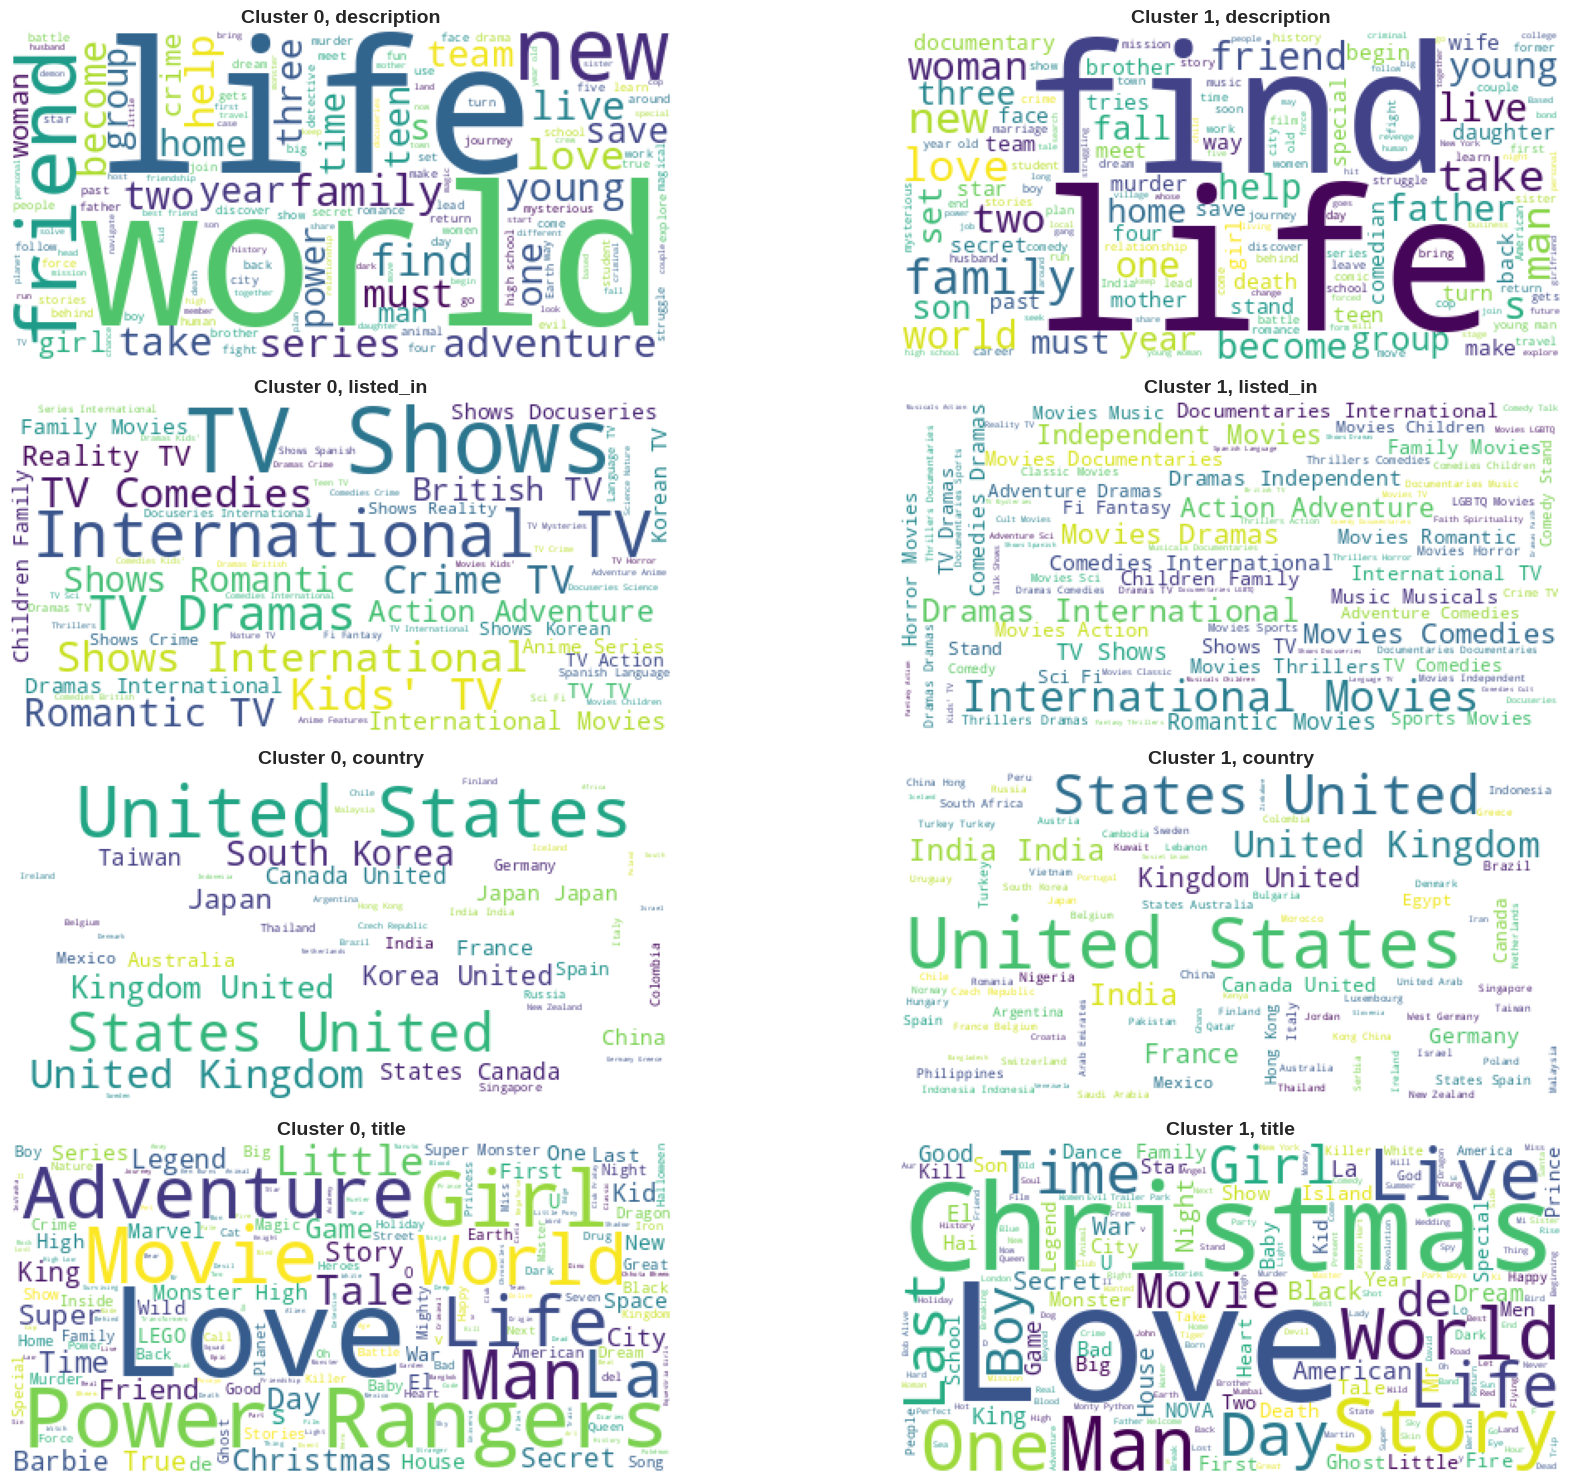

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 Recommendaton System

In this project, we utilize cosine similarity as a measure of similarity between two documents or pieces of text. Cosine similarity assesses the cosine of the angle between two non-zero vectors in a multidimensional space, ranging from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

Cosine similarity is employed to determine the similarity between documents represented as vectors in a high-dimensional space, where each dimension corresponds to a word or term in the corpus. By calculating the cosine similarity between these vectors, we can gauge the similarity of documents based on their word usage.

We opt for cosine similarity over tf-idf for several reasons:

Handling High-Dimensional Sparse Data: Cosine similarity performs better with high-dimensional sparse data, which is common in text data represented as vectors.

Capturing Text Meaning: Cosine similarity captures the meaning of text more effectively than tf-idf. For instance, if two items contain similar words but in different orders, cosine similarity still considers them similar, while tf-idf may not. This is because tf-idf solely considers the frequency of words in a document and overlooks their order or semantic meaning.

By leveraging cosine similarity, we can generate more accurate and meaningful recommendations by assessing the semantic similarity between documents, leading to improved user satisfaction and engagement.

In [ ]:
# ML Model - 3 Implementation
from sklearn.metrics.pairwise import cosine_similarity

def recommend_content(title, cosine_sim=cosine_sim, data=df_Netfli):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].tolist()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table


To evaluate the performance of your recommender system

In [ ]:
# Testing indian movie
recommend_content('Judwaa')

Recommendation  Similarity_score(0-1)
0               Haseena Maan Jaayegi                 0.3353
1                 Kuch Kuch Hota Hai                 0.2485
2               Mujhse Shaadi Karogi                 0.2421
3                     Chal Mere Bhai                 0.2381
4                Hum Aapke Hain Koun                 0.2374
5                           Judwaa 2                 0.2367
6                    Andaz Apna Apna                 0.2204
7  Kyo Kii... Main Jhuth Nahin Bolta                 0.2190
8              Together For Eternity                 0.2176
9                      Hello Brother                 0.1991

In [ ]:
# Testing non indian movie
recommend_content('Night Moves')

Recommendation  Similarity_score(0-1)
0                     Green Room                 0.1438
1                   The Runaways                 0.1332
2                       Wildling                 0.1071
3                     Zombieland                 0.0942
4  Dr. Seuss' The Cat in the Hat                 0.0925
5                     Effie Gray                 0.0902
6                 I Lost My Body                 0.0891
7                         Equals                 0.0869
8              Manhattan Romance                 0.0859
9                        The Fix                 0.0850

In [ ]:
# Testing indian tv show
recommend_content('Virsa')

Recommendation  Similarity_score(0-1)
0                    Naughty Jatts                 0.1671
1                          Dushman                 0.1238
2                 Jatts in Golmaal                 0.1234
3                          Karzzzz                 0.1221
4               Zindagi Gulzar Hai                 0.1209
5                 Ek Jaan Hain Hum                 0.1194
6                        Ram Jaane                 0.1171
7                    Coffee with D                 0.1133
8  David Batra: Elefanten i rummet                 0.1099
9                     Manje Bistre                 0.1081

In [ ]:
# Testing non indian tv show
recommend_content('The World Is Yours')

Recommendation  Similarity_score(0-1)
0                    Divines                 0.1516
1                   Vampires                 0.1421
2             Call My Agent!                 0.1081
3        They Are Everywhere                 0.0855
4               Le K Benzema                 0.0833
5             Cézanne et moi                 0.0783
6       Journey to Greenland                 0.0778
7                Young Tiger                 0.0758
8  Room 2806: The Accusation                 0.0740
9        A Very Special Love                 0.0738

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We've opted for the Silhouette Score as our evaluation metric over the Distortion Score (also known as inertia or sum of squared distances) due to its comprehensive assessment of cluster quality. Unlike the Distortion Score, which solely measures the compactness of clusters, the Silhouette Score considers both cohesion and separation.

Cohesion and Separation: The Silhouette Score captures how well data points within a cluster are similar (cohesion) and how distinct clusters are from each other (separation). This dual consideration offers a more nuanced understanding of cluster quality.

Shape Sensitivity: Unlike the Distortion Score, which tends to favor spherical clusters, the Silhouette Score is less sensitive to cluster shape variations. This flexibility is advantageous for datasets where clusters may have irregular shapes or varying densities.

Interpretability: The Silhouette Score provides a more intuitive interpretation by assigning a score to each data point rather than a single value for the entire clustering solution. This granularity enables finer scrutiny of individual data point assignments and cluster boundaries.

In summary, the Silhouette Score offers a holistic evaluation of cluster quality, considering both intra-cluster cohesion and inter-cluster separation, making it a preferred choice for assessing clustering performance in scenarios with non-spherical clusters like ours.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Certainly, it's clear that K-means is the preferred choice for your clustering task due to several advantages:

High Silhouette Score: K-means clustering yields a relatively high Silhouette Score compared to other methods, indicating better cluster cohesion and separation.

Clear Separation of Clusters: The clusters generated by K-means are well-separated in three dimensions, indicating distinct groupings of data points.

Speed and Ease of Use: K-means is relatively simple to implement and interpret. It requires only a few parameters, such as the number of clusters, and produces a clear partitioning of the data. This simplicity makes it a preferred choice, especially for applications where interpretability is crucial.

Scalability: K-means can efficiently handle large datasets with numerous variables or dimensions. In contrast, hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase, making K-means more suitable for scalability.

Non-overlapping Clusters: K-means produces non-overlapping clusters, which is desirable for many applications where distinct separation between groups is necessary for decision-making.

Considering these factors, it's evident that K-means is the optimal choice for your clustering task, offering both high performance and ease of interpretation.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used in the recommend_content function is based on cosine similarity. Cosine similarity is a metric used to measure the similarity between two vectors in a high-dimensional space. In the context of recommendation systems, cosine similarity is often used to find similarities between items or documents based on their feature vectors.



# **Conclusion**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, several conclusions can be drawn:**

Content Distribution: Approximately two-thirds of the content on Netflix consists of movies, while the remaining one-third comprises TV shows.

Content Categories: Adult and teen categories are prevalent, with TV shows containing more family-friendly content compared to movies.

Regional Dominance: Indian actors feature prominently in Netflix movies, whereas popular Indian actors are notably absent from TV shows.

Director Trends: Jan Suter emerges as the most common movie director, while Ken Burns leads in TV show direction.

Production Origins: The United States and India are the top producers of Netflix content. Japan and South Korea show potential for TV show growth.

Popular Genres:documntary,stand up comedy International movies, dramas, and comedies are the most popular genres on Netflix.

Trends in Additions: TV show additions have increased since 2018, with peaks in October, November, and December. Movie additions have seen fluctuations, with fewer additions in 2020 compared to 2019.

Addition Patterns: Content tends to be added at the start or middle of the month, with weekends being popular times for additions.

Duration Distribution: Most movies have durations ranging from 80 to 120 minutes, while TV shows commonly have one or two seasons.

Global Content Contributions: Various countries contribute to adult and teen content, with Spain leading in adult content and Canada focusing on children and family-friendly categories.

**Based on the implementation of K-Means Clustering and Agglomerative Hierarchical Clustering on the Netflix Movies TV show dataset, several conclusions and decisions can be made:**

Optimal Number of Clusters:

K-Means Clustering suggests an optimal number of 4 clusters, while Agglomerative Hierarchical Clustering indicates 2 clusters as optimal.
Evaluation Metric Choice:

Silhouette Score was preferred over distortion score as the evaluation metric. It offers better interpretability and is less sensitive to cluster shape variations.
Recommendation System Implementation:

A recommendation system was developed leveraging the clustering results. This system aims to enhance user experience and reduce subscriber churn by providing personalized recommendations based on similarity scores derived from the clustering model.
By integrating this recommendation system into Netflix's platform, users can receive tailored suggestions that align closely with their preferences, leading to increased engagement and satisfaction. Additionally, the system can help Netflix retain subscribers by offering relevant content, thereby reducing churn rates.

**Future work on this project could involve integrating the Netflix dataset with external sources to further enrich the analysis and enhance the recommender system:**

Integration with IMDB Ratings: Incorporating IMDB ratings for movies and TV shows could provide valuable insights into content popularity and user preferences. By leveraging this additional data, the recommender system could prioritize highly-rated content, ensuring that users receive recommendations for top-quality entertainment.

Books Clustering Integration: Expanding the analysis to include clustering of book titles or genres could offer a holistic view of user interests across different forms of media. By clustering book titles based on similarities in themes or genres, the recommender system could recommend books to users who have shown a preference for certain types of movies or TV shows.

Plant-based Type Clustering: If relevant, clustering plant-based content types could be explored to cater to users interested in gardening, landscaping, or botany-related topics. By identifying clusters within plant-based content, the recommender system could offer tailored recommendations to users with specific gardening or plant-related interests.

Comprehensive Recommender System Deployment: Once integrated with external data sources and enhanced with additional clustering analyses, the recommender system could be deployed on the web or within the Netflix platform for widespread usage. This would allow users to benefit from personalized recommendations that consider a diverse range of interests and preferences.

By expanding the analysis and incorporating external data sources, the recommender system could offer more accurate and relevant recommendations, ultimately enhancing the overall user experience and satisfaction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***